# **SPOTIFY STATISTICS**
 **From 2020 to 2025-08-04*

# **0. Table of contents**

In [176]:
from IPython.display import Markdown # type: ignore
import re
import nbformat # type: ignore
import os

def generate_markdown_toc(notebook_path=None):
    # If no path is provided, use current path (open notebook)
    if notebook_path is None:
        notebook_path = os.path.basename(__file__) if '__file__' in globals() else None
        if notebook_path is None:
            print("Unable to automatically determine notebook path. Please pass it in manually.")
            return
    # Read notebook contents
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    toc = "## Table of Contents\n\n"
    for cell in nb.cells:
        if cell.cell_type == 'markdown':
            for line in cell.source.splitlines():
                m = re.match(r'^(#+)\s+(.*)', line)
                if m:
                    level = len(m.group(1))
                    title = m.group(2).strip()
                    # Create anchor: remove special characters, lowercase, replace spaces = "-"
                    anchor = re.sub(r'[^a-zA-Z0-9 ]', '', title).lower().replace(' ', '-')
                    toc += f"{'  ' * (level - 1)}- [{title}](#{anchor})\n"
    return Markdown(toc)
generate_markdown_toc("my-spotify-activity-2025-08-11.ipynb")

## Table of Contents

- [**0. Table of contents**](#0-table-of-contents)
- [**I. Import Library**](#i-import-library)
- [**II. Prepared functions**](#ii-prepared-functions)
  - [**II.1. Function to FIX FONT ERRORS**](#ii1-function-to-fix-font-errors)
- [**III. MARQUEE**](#iii-marquee)
  - [**III.1. Import MY MARQUEE**](#iii1-import-my-marquee)
  - [**III.2. MY MARQUEE contributions**](#iii2-my-marquee-contributions)
- [**IV. MY OFFLINE PLAYLISTs**](#iv-my-offline-playlists)
  - [**IV.1. Import MY OFFLINE PLAYLISTs**](#iv1-import-my-offline-playlists)
  - [**IV.2. MY PLAYLISTs track contributions**](#iv2-my-playlists-track-contributions)
  - [**IV.3. MY OFFLINE PLAYLISTs track by month**](#iv3-my-offline-playlists-track-by-month)
- [**V. PREPARED dataset and thumbnails**](#v-prepared-dataset-and-thumbnails)
  - [**V.1. Import MY STREAMINGs**](#v1-import-my-streamings)
  - [**V.2. Import TRACK THUMBNAILs**](#v2-import-track-thumbnails)
    - [**V.2.1. List TRACK IDs**](#v21-list-track-ids)
    - [**V.2.2. Import TRACK THUMBNAIL by Embed API**](#v22-import-track-thumbnail-by-embed-api)
    - [**V.2.3. Download TRACK THUMBNAIL**](#v23-download-track-thumbnail)
    - [**V.2.4. Save TRACK THUMBNAIL to a files**](#v24-save-track-thumbnail-to-a-files)
    - [**V.2.5. Import TRACK THUMBNAIL from saved files**](#v25-import-track-thumbnail-from-saved-files)
  - [**V.3. Import ARTIST THUMBNAILs**](#v3-import-artist-thumbnails)
    - [**V.3.1. Import ARTIST THUMBNAILs by Client API**](#v31-import-artist-thumbnails-by-client-api)
    - [**V.3.2. Download ARTIST THUMBNAILs**](#v32-download-artist-thumbnails)
    - [**V.3.3. Save ARTIST THUMBNAILs to a files**](#v33-save-artist-thumbnails-to-a-files)
    - [**V.3.4. Import ARTIST THUMBNAILs from saved files**](#v34-import-artist-thumbnails-from-saved-files)
  - [**V.4. Import ALBUM THUMBNAILs**](#v4-import-album-thumbnails)
    - [**V.4.1. Import ALBUM THUMBNAILs by Client API**](#v41-import-album-thumbnails-by-client-api)
    - [**V.4.2. Download ALBUM THUMBNAILs**](#v42-download-album-thumbnails)
    - [**V.4.3. Save ALBUM THUMBNAILs to a files**](#v43-save-album-thumbnails-to-a-files)
    - [**V.4.4. Import ALBUM THUMBNAILs from saved files**](#v44-import-album-thumbnails-from-saved-files)
  - [**V.5. Merge MY STREAMINGs and TRACK THUMBNAILs**](#v5-merge-my-streamings-and-track-thumbnails)
- [**VI. MY STREAMINGs**](#vi-my-streamings)
  - [**VI.1. MY STREAMINGs Media Types contributions**](#vi1-my-streamings-media-types-contributions)
  - [**VI.2. TOP 20 MY STREAMINGs audio tracks**](#vi2-top-20-my-streamings-audio-tracks)
  - [**VI.3. TOP 20 MY STREAMINGs audio artists**](#vi3-top-20-my-streamings-audio-artists)
  - [**VI.4. TOP 20 MY STREAMINGs audio albums**](#vi4-top-20-my-streamings-audio-albums)
  - [**VI.5. MY STREAMINGs by year**](#vi5-my-streamings-by-year)
  - [**VI.6. MY STREAMINGs by month**](#vi6-my-streamings-by-month)
  - [**VI.7. MY STREAMINGs Top Artist by month**](#vi7-my-streamings-top-artist-by-month)
    - [**VI.7.+ [THUMBNAIL] MY STREAMINGs Top Artist by month**](#vi7-thumbnail-my-streamings-top-artist-by-month)
  - [**VI.8. MY STREAMINGs Top Audio Track by month**](#vi8-my-streamings-top-audio-track-by-month)
    - [**VI.8.+ [THUMBNAIL] MY STREAMINGs Top Audio Track by month**](#vi8-thumbnail-my-streamings-top-audio-track-by-month)
  - [**VI.9. MY STREAMINGs Top Album by month**](#vi9-my-streamings-top-album-by-month)
    - [**VI.9.+ [THUMBNAIL] MY STREAMINGs Top Album by month**](#vi9-thumbnail-my-streamings-top-album-by-month)
  - [**VI.10. MY STREAMINGs by hour**](#vi10-my-streamings-by-hour)
  - [**VI.11. MY STREAMINGs over time**](#vi11-my-streamings-over-time)
- [**THE END**](#the-end)


---
# **I. Import Library**

In [19]:
import pandas as pd # type: ignore
from datetime import datetime
import matplotlib.pyplot as plt # type: ignore
import matplotlib.patches as mpatches  # type: ignore
import matplotlib.cm as cm # type: ignore
import seaborn as sns # type: ignore
import numpy as np  # type: ignore
import os
import json
from zoneinfo import ZoneInfo
import requests
import re

> ##### *For display

In [3]:
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

---
# **II. Prepared functions**

## **II.1. Function to FIX FONT ERRORS**

In [4]:
def fix_encoding_error(text):
    try:
        return text.encode("latin1").decode("utf-8")
    except:
        return text

---
# **III. MARQUEE**

## **III.1. Import MY MARQUEE**

In [9]:
marquee_df = pd.read_json("/Users/tainguyen/Desktop/Python/Spotify Account Data/Marquee.json")
marquee_df = marquee_df.drop_duplicates()
print("Describe Marquee:",marquee_df.describe())
marquee_df

Describe Marquee:        artistName                      segment
count         411                          411
unique        410                            4
top       Mustard  Previously Active Listeners
freq            2                          331


artistName                      segment
0              Binz  Previously Active Listeners
1            Polo G           Moderate listeners
2       Anh Tú Atus  Previously Active Listeners
3           50 Cent  Previously Active Listeners
4             Hà Lê  Previously Active Listeners
5            B-Wine  Previously Active Listeners
6    Kemi not a Kid  Previously Active Listeners
7        Brownstone  Previously Active Listeners
8           Crank D           Moderate listeners
9     Sleepy Hallow  Previously Active Listeners
..              ...                          ...
402            Kejo  Previously Active Listeners
403          Wxrdie  Previously Active Listeners
404          Spyder  Previously Active Listeners
405          Anh Tú  Previously Active Listeners
406        Lefty Sm  Previously Active Listeners
407            RICK  Previously Active Listeners
408            Nevi  Previously Active Listeners
409      MC Formosa  Previously Active Listeners
410       Pháp Kiều  Previously Active Listeners
411    Lil Uzi Vert  Previously Active Listeners

[411 rows x 2 columns]

## **III.2. MY MARQUEE contributions**

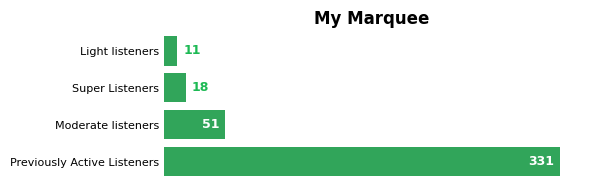

In [522]:
marquee_agg = (
    marquee_df
    .groupby("segment")
    .agg(count_artist=("artistName", "nunique"))
    .sort_values("count_artist")
    .reset_index()
)
plt.figure(figsize=(6,2))
ax = sns.barplot(
    data=marquee_agg,
    y="segment",
    x=marquee_agg["count_artist"],
    dodge=False,
    # palette=colors
    color="#1db954"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, value in enumerate(marquee_agg["count_artist"]):
    if value > 20:
        ax.text(value-5, i, value, va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
    else:
        ax.text(value+5, i, value, va="center", fontsize=9, ha="left", color="#1db954", fontweight = "bold")

plt.title("My Marquee", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.savefig("III.2. MY MARQUEE contributions.png")
plt.show()

---
# **IV. MY OFFLINE PLAYLISTs**

## **IV.1. Import MY OFFLINE PLAYLISTs**

In [151]:
with open("/Users/tainguyen/Desktop/Python/Spotify Account Data/Playlist1.json", "r") as f:
    offline_playlist_raw_data = json.load(f)
offline_playlist_records = []
for item in offline_playlist_raw_data['playlists']:
     playlist = item.get('name','')
     playlist_last_modified = item.get('lastModifiedDate','')
     items = item.get('items',[])
     for entry in items:
          track = entry.get('track',{})
          track_added_date = entry.get('addedDate','')
          track_name = track.get('trackName','')
          artist = track.get('artistName','')
          album = track.get('albumName','')
          track_id = track.get('trackUri','')
          offline_playlist_records.append({
               'name' : playlist,
               'last_modified': playlist_last_modified,
               'track_name' : track_name,
               'artist': artist,
               'album': album,
               'track_id': track_id,
               'track_added_date': track_added_date
          })
offline_playlist_df = pd.DataFrame(offline_playlist_records)
offline_playlist_df = offline_playlist_df.drop_duplicates()
print("Describe My Offline Playlists:\n",offline_playlist_df.describe(include="object"))

offline_playlist_df

Describe My Offline Playlists:
               name last_modified track_name       artist   album  \
count           83            83         83           83      83   
unique           5             5         82           37      46   
top     Es aey dee    2025-07-25   Sprinter  Post Malone  AUSTIN   
freq            21            21          2           17      17   

                                    track_id track_added_date  
count                                     83               83  
unique                                    82               23  
top     spotify:track:2FDTHlrBguDzQkp7PVj16Q       2023-08-12  
freq                                       2               17  


name last_modified  \
0   My top tracks playlist    2025-08-04   
1   My top tracks playlist    2025-08-04   
2   My top tracks playlist    2025-08-04   
3   My top tracks playlist    2025-08-04   
4   My top tracks playlist    2025-08-04   
5     Post Malone – AUSTIN    2023-11-03   
6     Post Malone – AUSTIN    2023-11-03   
7     Post Malone – AUSTIN    2023-11-03   
8     Post Malone – AUSTIN    2023-11-03   
9     Post Malone – AUSTIN    2023-11-03   
..                     ...           ...   
73                  bitch!    2022-12-07   
74                  bitch!    2022-12-07   
75                  bitch!    2022-12-07   
76                  bitch!    2022-12-07   
77                  bitch!    2022-12-07   
78                  bitch!    2022-12-07   
79                  bitch!    2022-12-07   
80                  bitch!    2022-12-07   
81                  bitch!    2022-12-07   
82                  bitch!    2022-12-07   

                                           track_name             artist  \
0              act ii: date @ 8 (feat. Drake) - remix              4batz   
1                                             one day               Nevi   
2                                        I Don't Know      Trevor Daniel   
3                                            Sprinter               Dave   
4                                    Cafein Freestyle          24k.Right   
5                                    Don't Understand        Post Malone   
6                                      Something Real        Post Malone   
7                                            Chemical        Post Malone   
8                                           Novacandy        Post Malone   
9                                            Mourning        Post Malone   
..                                                ...                ...   
73                                                 16          Baby Keem   
74                                            Bad Hoe   Tom The Mail Man   
75        Livin It Up (with Post Malone & A$AP Rocky)         Young Thug   
76                                             Wraith  Chance the Rapper   
77                                           Die Hard     Kendrick Lamar   
78                             All Girls Are The Same         Juice WRLD   
79                                           Đơn Giản              Low G   
80  The Regionals: Vietnam (feat. B-Wine, Blacka, ...         9th Wonder   
81                                       ngủ một mình         HIEUTHUHAI   
82                                         Phong Cách            RPT MCK   

                                                album  \
0              act ii: date @ 8 (feat. Drake) [remix]   
1                                             one day   
2                                            Homesick   
3                                            Sprinter   
4                          Nội Dung Nhạy Cảm - Part 2   
5                                              AUSTIN   
6                                              AUSTIN   
7                                              AUSTIN   
8                                              AUSTIN   
9                                              AUSTIN   
..                                                ...   
73                                   The Melodic Blue   
74                       Sometimes Sorry Isn't Enough   
75                                               Punk   
76                                             Wraith   
77                      Mr. Morale & The Big Steppers   
78                            Goodbye & Good Riddance   
79                                           Đơn Giản   
80  The Regionals: Vietnam (feat. B-Wine, Blacka, ...   
81                                       ngủ một mình   
82                                         Phong Cách   

                                track_id track_added_date  
0   spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS       2025-08-04  
1   s

## **IV.2. MY PLAYLISTs track contributions**

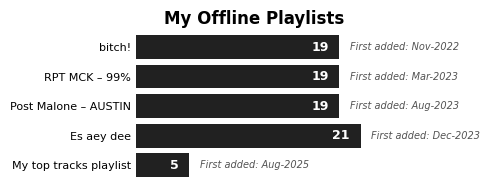

In [523]:
offline_playlist_df['track_added_date'] = pd.to_datetime(offline_playlist_df['track_added_date'], errors='coerce')
offline_playlist_agg = (
    offline_playlist_df
    .groupby("name")
    .agg(count_track=("track_id", "nunique"), first_added_date=("track_added_date","min"))
    .sort_values("first_added_date")
    .reset_index()
)
offline_playlist_agg["first_added_date"] = "First added: " + offline_playlist_agg["first_added_date"].dt.strftime("%b-%Y")

plt.figure(figsize=(5,2))
ax = sns.barplot(
    data=offline_playlist_agg,
    y="name",
    x=offline_playlist_agg["count_track"],
    dodge=False,
    # palette=colors
    color="#212121"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_added_date) in enumerate(zip(offline_playlist_agg["count_track"],offline_playlist_agg["first_added_date"])):
    ax.text(value-1, i, value, va="center", fontsize=9, ha="right", color="white", fontweight="bold")
    ax.text(value+1, i, first_added_date, va="center", fontsize=7, ha="left", color="#535353", fontstyle="italic")

plt.title("My Offline Playlists", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
plt.savefig("IV.2. MY PLAYLISTs track contributions.png")
plt.show()

## **IV.3. MY OFFLINE PLAYLISTs track by month**

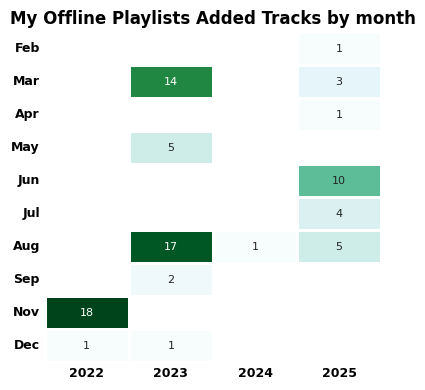

In [524]:
offline_playlist_df["year"] = offline_playlist_df["track_added_date"].dt.to_period("Y")
offline_playlist_df["month_number"] = offline_playlist_df["track_added_date"].dt.month
offline_playlist_df["month"] = offline_playlist_df["track_added_date"].dt.strftime("%b")
offline_playlist_month_pivot = offline_playlist_df.pivot_table(
    index="month_number",
    columns="year",
    values="track_id",
    aggfunc="nunique",
    fill_value=0
)
month_order = offline_playlist_df[["month_number","month"]].drop_duplicates().sort_values("month_number")["month"].values
offline_playlist_month_pivot.index = month_order
mask = offline_playlist_month_pivot == 0

plt.figure(figsize=(4,4))
sns.heatmap(offline_playlist_month_pivot, annot=True, fmt="d", cmap="BuGn", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":8})
plt.title("My Offline Playlists Added Tracks by month", fontweight="bold")
plt.yticks(rotation=0, fontsize=9, fontweight="bold")
plt.xticks(fontsize = 9, fontweight="bold")
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("IV.3. MY OFFLINE PLAYLISTs track by month.png")
plt.show()

---
# **V. PREPARED dataset and thumbnails**

## **V.1. Import MY STREAMINGs**

In [29]:
base_path = "/Users/tainguyen/Desktop/Python/Spotify Extended Streaming History/"
streaming_records = []

for root, dirs, files in os.walk(base_path):
    for file_name in files:
        if file_name.startswith("Streaming_History_Audio") and file_name.endswith(".json"):
            default_media_type = "audio"
        elif file_name.startswith("Streaming_History_Video") and file_name.endswith(".json"):
            default_media_type = "video"
        else:
            continue
        file_path = os.path.join(root, file_name)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                streaming_raw_data = json.load(f)
            for item in streaming_raw_data:
                if item.get('episode_name') or item.get('spotify_episode_uri'):
                    media_type = "podcast"
                    track_name = item.get('episode_name', item.get('master_metadata_track_name', ''))
                    album = item.get('episode_show_name', item.get('master_metadata_album_album_name', ''))
                    artist = item.get('episode_show_name', item.get('master_metadata_album_artist_name', ''))
                    track_id = item.get('spotify_episode_uri', item.get('spotify_track_uri', ''))
                else:
                    media_type = default_media_type
                    track_name = item.get('master_metadata_track_name', '')
                    album = item.get('master_metadata_album_album_name', '')
                    track_id = item.get('spotify_track_uri', '')
                    artist = item.get('master_metadata_album_artist_name', '')
                streaming_records.append({
                    "datetime": item.get('ts', ''),
                    "media_type": media_type,
                    "track_name": track_name,
                    "artist": artist,
                    "album": album,
                    "track_id": track_id, 
                    "ms_played": item.get('ms_played', 0),
                })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

streaming_df = pd.DataFrame(streaming_records)
streaming_df["hour_played"] = streaming_df["ms_played"] / 3600000
streaming_df['datetime'] = pd.to_datetime(streaming_df['datetime'], errors='coerce')
streaming_df['datetime'] = streaming_df['datetime'].dt.tz_convert('Asia/Ho_Chi_Minh').dt.tz_localize(None)
streaming_df = streaming_df.drop_duplicates()
streaming_df = streaming_df.sort_values(by="datetime",ascending=False)
print("Describe My Streaming:\n",streaming_df.describe(include='object'))
streaming_df

Describe My Streaming:
        media_type                              track_name       artist  album  \
count       39533                                   39529        39529  39529   
unique          3                                    6106         2042   4519   
top         audio  act ii: date @ 8 (feat. Drake) - remix  Post Malone    99%   
freq        39031                                     118         1903   1064   

                                    track_id  
count                                  39529  
unique                                  6826  
top     spotify:track:3QS9ZCtoSCJhmaJ7QNXSAS  
freq                                     118  


datetime media_type                             track_name  \
39627 2025-08-04 06:58:04      audio     MUTT (feat. Freddie Gibbs) [Remix]   
39626 2025-08-04 06:53:46      audio                          Electric Feel   
39625 2025-08-04 06:49:55      audio                              undressed   
39624 2025-08-04 06:46:53      audio                            Ms. Jackson   
39623 2025-08-04 06:42:22      audio                                Ladders   
39622 2025-08-04 06:37:34      audio                     Young Dumb & Broke   
39621 2025-08-04 06:34:11      audio                              YES IT IS   
39620 2025-08-04 06:30:22      audio                                GO BABY   
39619 2025-08-04 06:27:07      audio                        back to friends   
39618 2025-08-04 06:23:47      audio                                    LVL   
...                   ...        ...                                    ...   
15974 2020-01-21 08:38:28      audio                                Circles   
15973 2020-01-20 17:51:08      audio     Leaving Heaven (feat. Skylar Grey)   
15972 2020-01-20 16:34:28      audio                               Darkness   
15971 2020-01-20 16:34:27      audio                               Darkness   
15969 2020-01-20 16:28:44      audio            Godzilla (feat. Juice WRLD)   
15967 2020-01-20 16:25:14      audio                            In Too Deep   
15965 2020-01-20 16:21:59      audio  Those Kinda Nights (feat. Ed Sheeran)   
15963 2020-01-20 16:19:01      audio                            In Too Deep   
15962 2020-01-20 16:19:01      audio                            In Too Deep   
15961 2020-01-20 16:18:59      audio  Those Kinda Nights (feat. Ed Sheeran)   

              artist                            album  \
39627    Leon Thomas                             MUTT   
39626           MGMT             Oracular Spectacular   
39625          sombr                        undressed   
39624        Outkast                        Stankonia   
39623     Mac Miller                         Swimming   
39622         Khalid                    American Teen   
39621    Leon Thomas                             MUTT   
39620  Justin Bieber                             SWAG   
39619          sombr                  back to friends   
39618     A$AP Rocky  LONG.LIVE.A$AP (Deluxe Version)   
...              ...                              ...   
15974    Post Malone             Hollywood's Bleeding   
15973         Eminem          Music To Be Murdered By   
15972         Eminem          Music To Be Murdered By   
15971         Eminem          Music To Be Murdered By   
15969         Eminem          Music To Be Murdered By   
15967         Eminem          Music To Be Murdered By   
15965         Eminem          Music To Be Murdered By   
15963         Eminem          Music To Be Murdered By   
15962         Eminem          Music To Be Murdered By   
15961         Eminem          Music To Be Murdered By   

                                   track_id  ms_played  hour_played  
39627  spotify:track:7qEVRQ63lrsY3TJHSpjRLw     257383     0.071495  
39626  spotify:track:3FtYbEfBqAlGO46NUDQSAt     229640     0.063789  
39625  spotify:track:4AajxCEwGEsmHmT4H1TwjY     182088     0.050580  
39624  spotify:track:0I3q5fE6wg7LIfHGngUTnV     270506     0.075141  
39623  spotify:track:39NDBdU5Xkm5pCFGa5kZtI     287040     0.079733  
39622  spotify:track:5Z3GHaZ6ec9bsiI5BenrbY     202546     0.056263  
39621  spotify:track:2iksjpqL3eraxCBKqNHuqd     228047     0.063346  
39620  spotify:track:01p5urrGw5fuFCcfT7PBgc     194760     0.054100  
39619  spotify:track:0FTmksd2dxiE5e3rWyJXs6     199032     0.055287  
39618  spotify:track:787rCZF9i4L1cXGMkdyIk4     220133     0.061148  
...                                     ...        ...          ...  
15974  spotify:track:21jGcNKet2qwijlDFuPiPb      66304     0.018418  
15973  spotify:track:5CpsIb7SMFHjmAG8RvIWfq     265280     0.073689  
15972  spotify:track:5SiZJoLXp3WOl3J4C8IK0d

## **V.2. Import TRACK THUMBNAILs**

### **V.2.1. List TRACK IDs**

In [6]:
track_ids = streaming_df["track_id"].dropna().unique()
track_ids_df = pd.DataFrame(track_ids, columns=["track_id"])
track_ids_df

track_id
0     spotify:track:7qEVRQ63lrsY3TJHSpjRLw
1     spotify:track:3FtYbEfBqAlGO46NUDQSAt
2     spotify:track:4AajxCEwGEsmHmT4H1TwjY
3     spotify:track:0I3q5fE6wg7LIfHGngUTnV
4     spotify:track:39NDBdU5Xkm5pCFGa5kZtI
5     spotify:track:5Z3GHaZ6ec9bsiI5BenrbY
6     spotify:track:2iksjpqL3eraxCBKqNHuqd
7     spotify:track:01p5urrGw5fuFCcfT7PBgc
8     spotify:track:0FTmksd2dxiE5e3rWyJXs6
9     spotify:track:787rCZF9i4L1cXGMkdyIk4
...                                    ...
6816  spotify:track:3OaunNUlXXs5e2PXtNAzzG
6817  spotify:track:2hSGhdXXEQSGrxFloqbPTv
6818  spotify:track:7aiClxsDWFRQ0Kzk5KI5ku
6819  spotify:track:2v5JTeM6hSmi5wWy7jiwrI
6820  spotify:track:10Igtw8bSDyyFs7KIsKngZ
6821  spotify:track:4EAV2cKiqKP5UPZmY6dejk
6822  spotify:track:2oQ7BMTdgpDl2SGXmap92X
6823  spotify:track:5CpsIb7SMFHjmAG8RvIWfq
6824  spotify:track:5SiZJoLXp3WOl3J4C8IK0d
6825  spotify:track:7Dj2wqPYXfSRFwa6qyOztr

[6826 rows x 1 columns]

### **V.2.2. Import TRACK THUMBNAIL by Embed API**

In [21]:
def get_spotify_poster(track_id):
    url = f"https://open.spotify.com/oembed?url={track_id}"
    try:
        res = requests.get(url, timeout=10)
        if res.status_code == 200:
            data = res.json()
            return data.get("thumbnail_url", None)
        else:
            return None
    except Exception as e:
        print(f"Error fetching {track_id}: {e}")
        return None
track_ids_df["poster_url"] = track_ids_df["track_id"].apply(get_spotify_poster)
track_ids_df

Error fetching spotify:track:26EjM7ZMAnWOKPAuKNOX24: HTTPSConnectionPool(host='open.spotify.com', port=443): Read timed out. (read timeout=10)


track_id  \
0     spotify:track:7qEVRQ63lrsY3TJHSpjRLw   
1     spotify:track:3FtYbEfBqAlGO46NUDQSAt   
2     spotify:track:4AajxCEwGEsmHmT4H1TwjY   
3     spotify:track:0I3q5fE6wg7LIfHGngUTnV   
4     spotify:track:39NDBdU5Xkm5pCFGa5kZtI   
5     spotify:track:5Z3GHaZ6ec9bsiI5BenrbY   
6     spotify:track:2iksjpqL3eraxCBKqNHuqd   
7     spotify:track:01p5urrGw5fuFCcfT7PBgc   
8     spotify:track:0FTmksd2dxiE5e3rWyJXs6   
9     spotify:track:787rCZF9i4L1cXGMkdyIk4   
...                                    ...   
6816  spotify:track:3OaunNUlXXs5e2PXtNAzzG   
6817  spotify:track:2hSGhdXXEQSGrxFloqbPTv   
6818  spotify:track:7aiClxsDWFRQ0Kzk5KI5ku   
6819  spotify:track:2v5JTeM6hSmi5wWy7jiwrI   
6820  spotify:track:10Igtw8bSDyyFs7KIsKngZ   
6821  spotify:track:4EAV2cKiqKP5UPZmY6dejk   
6822  spotify:track:2oQ7BMTdgpDl2SGXmap92X   
6823  spotify:track:5CpsIb7SMFHjmAG8RvIWfq   
6824  spotify:track:5SiZJoLXp3WOl3J4C8IK0d   
6825  spotify:track:7Dj2wqPYXfSRFwa6qyOztr   

                                             poster_url  
0     https://image-cdn-ak.spotifycdn.com/image/ab67...  
1     https://image-cdn-ak.spotifycdn.com/image/ab67...  
2     https://image-cdn-ak.spotifycdn.com/image/ab67...  
3     https://image-cdn-ak.spotifycdn.com/image/ab67...  
4     https://image-cdn-ak.spotifycdn.com/image/ab67...  
5     https://image-cdn-ak.spotifycdn.com/image/ab67...  
6     https://image-cdn-ak.spotifycdn.com/image/ab67...  
7     https://image-cdn-ak.spotifycdn.com/image/ab67...  
8     https://image-cdn-ak.spotifycdn.com/image/ab67...  
9     https://image-cdn-ak.spotifycdn.com/image/ab67...  
...                                                 ...  
6816  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6817  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6818  https://image-cdn-fa.spotifycdn.com/image/ab67...  
6819  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6820  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6821  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6822  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6823  https://image-cdn-ak.spotifycdn.com/image/ab67...  
6824  https://image-cdn-fa.spotifycdn.com/image/ab67...  
6825  https://image-cdn-fa.spotifycdn.com/image/ab67...  

[6826 rows x 2 columns]

### **V.2.3. Download TRACK THUMBNAIL**

In [ ]:
from urllib.parse import urlparse

# Create directory if it doesn't exist
output_dir = "/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/track-thumbnail/"
os.makedirs(output_dir, exist_ok=True)

# Function to download image and return local path
def download_track_image(row):
    if pd.isna(row['poster_url']):
        return None
    try:
        # Create filename from track id
        filename = row['track_id'] + '.jpg'  # Assuming jpg format
        filepath = os.path.join(output_dir, filename)
        # Download the image
        response = requests.get(row['poster_url'], stream=True)
        response.raise_for_status()
        with open(filepath, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        return filepath
    except Exception as e:
        print(f"Error downloading image for {row['track_id']}: {str(e)}")
        return None

# Add new column for local paths
track_ids_df['local_path'] = track_ids_df.apply(download_track_image, axis=1)
track_ids_df

track_id  \
0     spotify:track:7qEVRQ63lrsY3TJHSpjRLw   
1     spotify:track:3FtYbEfBqAlGO46NUDQSAt   
2     spotify:track:4AajxCEwGEsmHmT4H1TwjY   
3     spotify:track:0I3q5fE6wg7LIfHGngUTnV   
4     spotify:track:39NDBdU5Xkm5pCFGa5kZtI   
5     spotify:track:5Z3GHaZ6ec9bsiI5BenrbY   
6     spotify:track:2iksjpqL3eraxCBKqNHuqd   
7     spotify:track:01p5urrGw5fuFCcfT7PBgc   
8     spotify:track:0FTmksd2dxiE5e3rWyJXs6   
9     spotify:track:787rCZF9i4L1cXGMkdyIk4   
...                                    ...   
6816  spotify:track:3OaunNUlXXs5e2PXtNAzzG   
6817  spotify:track:2hSGhdXXEQSGrxFloqbPTv   
6818  spotify:track:7aiClxsDWFRQ0Kzk5KI5ku   
6819  spotify:track:2v5JTeM6hSmi5wWy7jiwrI   
6820  spotify:track:10Igtw8bSDyyFs7KIsKngZ   
6821  spotify:track:4EAV2cKiqKP5UPZmY6dejk   
6822  spotify:track:2oQ7BMTdgpDl2SGXmap92X   
6823  spotify:track:5CpsIb7SMFHjmAG8RvIWfq   
6824  spotify:track:5SiZJoLXp3WOl3J4C8IK0d   
6825  spotify:track:7Dj2wqPYXfSRFwa6qyOztr   

                                             poster_url  \
0     https://image-cdn-ak.spotifycdn.com/image/ab67...   
1     https://image-cdn-ak.spotifycdn.com/image/ab67...   
2     https://image-cdn-ak.spotifycdn.com/image/ab67...   
3     https://image-cdn-ak.spotifycdn.com/image/ab67...   
4     https://image-cdn-ak.spotifycdn.com/image/ab67...   
5     https://image-cdn-ak.spotifycdn.com/image/ab67...   
6     https://image-cdn-ak.spotifycdn.com/image/ab67...   
7     https://image-cdn-ak.spotifycdn.com/image/ab67...   
8     https://image-cdn-ak.spotifycdn.com/image/ab67...   
9     https://image-cdn-ak.spotifycdn.com/image/ab67...   
...                                                 ...   
6816  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6817  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6818  https://image-cdn-fa.spotifycdn.com/image/ab67...   
6819  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6820  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6821  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6822  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6823  https://image-cdn-ak.spotifycdn.com/image/ab67...   
6824  https://image-cdn-fa.spotifycdn.com/image/ab67...   
6825  https://image-cdn-fa.spotifycdn.com/image/ab67...   

                                             local_path  
0     /Users/tainguyen/Desktop/Python/my-spotify-act...  
1     /Users/tainguyen/Desktop/Python/my-spotify-act...  
2     /Users/tainguyen/Desktop/Python/my-spotify-act...  
3     /Users/tainguyen/Desktop/Python/my-spotify-act...  
4     /Users/tainguyen/Desktop/Python/my-spotify-act...  
5     /Users/tainguyen/Desktop/Python/my-spotify-act...  
6     /Users/tainguyen/Desktop/Python/my-spotify-act...  
7     /Users/tainguyen/Desktop/Python/my-spotify-act...  
8     /Users/tainguyen/Desktop/Python/my-spotify-act...  
9     /Users/tainguyen/Desktop/Python/my-spotify-act...  
...                                                 ...  
6816  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6817  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6818  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6819  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6820  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6821  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6822  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6823  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6824  /Users/tainguyen/Desktop/Python/my-spotify-act...  
6825  /Users/tainguyen/Desktop/Python/my-spotify-act...  

[6826 rows x 3 columns]

### **V.2.4. Save TRACK THUMBNAIL to a files**

In [27]:
track_ids_df.to_excel('track_thumbnail.xlsx', index=False)

### **V.2.5. Import TRACK THUMBNAIL from saved files**

In [7]:
track_thumbnail = pd.read_excel("/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/data/track_thumbnail.xlsx", sheet_name="Sheet1")
track_thumbnail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6826 entries, 0 to 6825
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   track_id    6826 non-null   object
 1   poster_url  6821 non-null   object
 2   local_path  6821 non-null   object
dtypes: object(3)
memory usage: 160.1+ KB


## **V.3. Import ARTIST THUMBNAILs**

### **V.3.1. Import ARTIST THUMBNAILs by Client API**

In [9]:
CLIENT_ID = ""
CLIENT_SECRET = ""

In [73]:
auth_url = "https://accounts.spotify.com/api/token"
auth_response = requests.post(auth_url, {
    "grant_type": "client_credentials",
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
})
auth_response_data = auth_response.json()
access_token = auth_response_data["access_token"]

headers = {"Authorization": f"Bearer {access_token}"}

def get_artist_image(artist_name):
    search_url = "https://api.spotify.com/v1/search"
    params = {"q": artist_name, "type": "artist", "limit": 1}
    response = requests.get(search_url, headers=headers, params=params)
    data = response.json()
    try:
        return data["artists"]["items"][0]["images"][0]["url"]
    except Exception:
        return None

unique_artists = streaming_df["artist"].dropna().unique()

artist_images = []
for artist in unique_artists:
    img_url = get_artist_image(artist)
    artist_images.append({"artist": artist, "artist_img": img_url})

artist_df = pd.DataFrame(artist_images)
artist_df

artist  \
0                  Leon Thomas   
1                         MGMT   
2                        sombr   
3                      Outkast   
4                   Mac Miller   
5                       Khalid   
6                Justin Bieber   
7                   A$AP Rocky   
8          The Backseat Lovers   
9                The Kid LAROI   
...                        ...   
2032  Jay Got Doinked By Spoti   
2033               Senses Fail   
2034             Patton Oswalt   
2035        Friends of Friends   
2036              Scotty Outty   
2037                     Einár   
2038                  Lil Pump   
2039                  RL Grime   
2040                 Lil Dicky   
2041                   Kid Ink   

                                             artist_img  
0     https://i.scdn.co/image/ab6761610000e5ebfa3acb...  
1     https://i.scdn.co/image/ab6761610000e5eb9dccdc...  
2     https://i.scdn.co/image/ab6761610000e5eb78edaa...  
3     https://i.scdn.co/image/ab6761610000e5eb0cb3f9...  
4     https://i.scdn.co/image/ab6761610000e5ebed3b89...  
5     https://i.scdn.co/image/ab6761610000e5eb8f77c3...  
6     https://i.scdn.co/image/ab6761610000e5eb86e362...  
7     https://i.scdn.co/image/ab6761610000e5eb5c58c4...  
8     https://i.scdn.co/image/ab6761610000e5eb42ba5f...  
9     https://i.scdn.co/image/ab6761610000e5ebb3fd5c...  
...                                                 ...  
2032  https://i.scdn.co/image/ab6761610000e5ebdaf497...  
2033  https://i.scdn.co/image/ab6761610000e5eb29fb2c...  
2034  https://i.scdn.co/image/5cd19652461bd12c571b6c...  
2035  https://i.scdn.co/image/ab6761610000e5eb94a832...  
2036  https://i.scdn.co/image/ab6761610000e5eb1e03dd...  
2037  https://i.scdn.co/image/ab6761610000e5ebeb9463...  
2038  https://i.scdn.co/image/ab6761610000e5eb6bc83a...  
2039  https://i.scdn.co/image/ab6761610000e5eb19a62c...  
2040  https://i.scdn.co/image/ab6761610000e5ebfd1780...  
2041  https://i.scdn.co/image/ab6761610000e5ebf4904a...  

[2042 rows x 2 columns]

### **V.3.2. Download ARTIST THUMBNAILs**

In [76]:
from urllib.parse import urlparse

# Create directory if it doesn't exist
output_dir = "/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/artist-thumbnail/"
os.makedirs(output_dir, exist_ok=True)

# Function to download image and return local path
def download_artist_image(row):
    if pd.isna(row['artist_img']):
        return None
    try:
        # Create filename from track id
        filename = row['artist'] + '.jpg'  # Assuming jpg format
        filepath = os.path.join(output_dir, filename)
        # Download the image
        response = requests.get(row['artist_img'], stream=True)
        response.raise_for_status()
        with open(filepath, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        return filepath
    except Exception as e:
        print(f"Error downloading image for {row['artist']}: {str(e)}")
        return None

# Add new column for local paths
artist_df['local_path'] = artist_df.apply(download_artist_image, axis=1)
artist_df

Error downloading image for Được/Mất: [Errno 2] No such file or directory: '/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/artist-thumbnail/Được/Mất.jpg'
Error downloading image for W/N: [Errno 2] No such file or directory: '/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/artist-thumbnail/W/N.jpg'


artist  \
0                  Leon Thomas   
1                         MGMT   
2                        sombr   
3                      Outkast   
4                   Mac Miller   
5                       Khalid   
6                Justin Bieber   
7                   A$AP Rocky   
8          The Backseat Lovers   
9                The Kid LAROI   
...                        ...   
2032  Jay Got Doinked By Spoti   
2033               Senses Fail   
2034             Patton Oswalt   
2035        Friends of Friends   
2036              Scotty Outty   
2037                     Einár   
2038                  Lil Pump   
2039                  RL Grime   
2040                 Lil Dicky   
2041                   Kid Ink   

                                             artist_img  \
0     https://i.scdn.co/image/ab6761610000e5ebfa3acb...   
1     https://i.scdn.co/image/ab6761610000e5eb9dccdc...   
2     https://i.scdn.co/image/ab6761610000e5eb78edaa...   
3     https://i.scdn.co/image/ab6761610000e5eb0cb3f9...   
4     https://i.scdn.co/image/ab6761610000e5ebed3b89...   
5     https://i.scdn.co/image/ab6761610000e5eb8f77c3...   
6     https://i.scdn.co/image/ab6761610000e5eb86e362...   
7     https://i.scdn.co/image/ab6761610000e5eb5c58c4...   
8     https://i.scdn.co/image/ab6761610000e5eb42ba5f...   
9     https://i.scdn.co/image/ab6761610000e5ebb3fd5c...   
...                                                 ...   
2032  https://i.scdn.co/image/ab6761610000e5ebdaf497...   
2033  https://i.scdn.co/image/ab6761610000e5eb29fb2c...   
2034  https://i.scdn.co/image/5cd19652461bd12c571b6c...   
2035  https://i.scdn.co/image/ab6761610000e5eb94a832...   
2036  https://i.scdn.co/image/ab6761610000e5eb1e03dd...   
2037  https://i.scdn.co/image/ab6761610000e5ebeb9463...   
2038  https://i.scdn.co/image/ab6761610000e5eb6bc83a...   
2039  https://i.scdn.co/image/ab6761610000e5eb19a62c...   
2040  https://i.scdn.co/image/ab6761610000e5ebfd1780...   
2041  https://i.scdn.co/image/ab6761610000e5ebf4904a...   

                                             local_path  
0     /Users/tainguyen/Desktop/Python/my-spotify-act...  
1     /Users/tainguyen/Desktop/Python/my-spotify-act...  
2     /Users/tainguyen/Desktop/Python/my-spotify-act...  
3     /Users/tainguyen/Desktop/Python/my-spotify-act...  
4     /Users/tainguyen/Desktop/Python/my-spotify-act...  
5     /Users/tainguyen/Desktop/Python/my-spotify-act...  
6     /Users/tainguyen/Desktop/Python/my-spotify-act...  
7     /Users/tainguyen/Desktop/Python/my-spotify-act...  
8     /Users/tainguyen/Desktop/Python/my-spotify-act...  
9     /Users/tainguyen/Desktop/Python/my-spotify-act...  
...                                                 ...  
2032  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2033  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2034  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2035  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2036  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2037  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2038  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2039  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2040  /Users/tainguyen/Desktop/Python/my-spotify-act...  
2041  /Users/tainguyen/Desktop/Python/my-spotify-act...  

[2042 rows x 3 columns]

### **V.3.3. Save ARTIST THUMBNAILs to a files**

In [78]:
artist_df.to_excel('artist_thumbnail.xlsx', index=False)

### **V.3.4. Import ARTIST THUMBNAILs from saved files**

In [8]:
artist_thumbnail = pd.read_excel("/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/data/artist_thumbnail.xlsx", sheet_name="Sheet1")
artist_thumbnail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist      2042 non-null   object
 1   artist_img  2033 non-null   object
 2   local_path  2031 non-null   object
dtypes: object(3)
memory usage: 48.0+ KB


## **V.4. Import ALBUM THUMBNAILs**

### **V.4.1. Import ALBUM THUMBNAILs by Client API**

In [13]:
auth_response = requests.post(
    "https://accounts.spotify.com/api/token",
    {
        "grant_type": "client_credentials",
        "client_id": CLIENT_ID,
        "client_secret": CLIENT_SECRET,
    },
)
access_token = auth_response.json()["access_token"]
headers = {"Authorization": f"Bearer {access_token}"}

def get_album_image(album_name, artist_name):
    query = f"album:{album_name} artist:{artist_name}"
    url = "https://api.spotify.com/v1/search"
    params = {"q": query, "type": "album", "limit": 1}
    r = requests.get(url, headers=headers, params=params)
    data = r.json()
    try:
        return data["albums"]["items"][0]["images"][0]["url"]
    except Exception:
        return None

albums = streaming_df[["artist", "album"]].dropna().drop_duplicates()

album_images = []
for _, row in albums.iterrows():
    img_url = get_album_image(row["album"], row["artist"])
    album_images.append({
        "album": row["album"],
        "artist": row["artist"],
        "album_img": img_url
    })

album_df = pd.DataFrame(album_images)
album_df

album         artist  \
0                                                  MUTT    Leon Thomas   
1                                  Oracular Spectacular           MGMT   
2                                             undressed          sombr   
3                                             Stankonia        Outkast   
4                                              Swimming     Mac Miller   
5                                         American Teen         Khalid   
6                                                  SWAG  Justin Bieber   
7                                       back to friends          sombr   
8                       LONG.LIVE.A$AP (Deluxe Version)     A$AP Rocky   
9                                              GO:OD AM     Mac Miller   
...                                                 ...            ...   
4614                                          Activated   Tee Grizzley   
4615                   The Return of East Atlanta Santa     Gucci Mane   
4616                                   Melly vs. Melvin      YNW Melly   
4617                                               NOVA       RL Grime   
4618  Horses (with PnB Rock, Kodak Black & A Boogie ...       PnB Rock   
4619                                    hot girl bummer      blackbear   
4620  I've Been Waiting (w/ ILoveMakonnen & Fall Out...       Lil Peep   
4621                  Freaky Friday (feat. Chris Brown)      Lil Dicky   
4622                                 Bobby Tarantino II          Logic   
4623      Hell & Back (Remix) [feat. Machine Gun Kelly]        Kid Ink   

                                              album_img  
0     https://i.scdn.co/image/ab67616d0000b2737fc4fb...  
1     https://i.scdn.co/image/ab67616d0000b2738b32b1...  
2     https://i.scdn.co/image/ab67616d0000b273dad39d...  
3     https://i.scdn.co/image/ab67616d0000b2732350e3...  
4     https://i.scdn.co/image/ab67616d0000b273175c57...  
5     https://i.scdn.co/image/ab67616d0000b273988ede...  
6     https://i.scdn.co/image/ab67616d0000b273172de5...  
7     https://i.scdn.co/image/ab67616d0000b2739d24f7...  
8     https://i.scdn.co/image/ab67616d0000b2732ae920...  
9     https://i.scdn.co/image/ab67616d0000b273ee0f38...  
...                                                 ...  
4614  https://i.scdn.co/image/ab67616d0000b27361d7aa...  
4615  https://i.scdn.co/image/ab67616d0000b2738c7541...  
4616  https://i.scdn.co/image/ab67616d0000b2730f47d8...  
4617  https://i.scdn.co/image/ab67616d0000b273798f31...  
4618  https://i.scdn.co/image/ab67616d0000b2736403ad...  
4619  https://i.scdn.co/image/ab67616d0000b273da8c35...  
4620                                               None  
4621  https://i.scdn.co/image/ab67616d0000b273306bbb...  
4622  https://i.scdn.co/image/ab67616d0000b273e19b1b...  
4623  https://i.scdn.co/image/ab67616d0000b27370ef94...  

[4624 rows x 3 columns]

### **V.4.2. Download ALBUM THUMBNAILs**

In [20]:
from urllib.parse import urlparse

# Create directory if it doesn't exist
output_dir = "/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/album-thumbnail/"
os.makedirs(output_dir, exist_ok=True)

# Function to download image and return local path
def download_album_image(row):
    if pd.isna(row['album_img']):
        return None
    try:
        # Create filename from track id
        filename = re.sub(r'[^A-Za-z0-9]+', '_', row['album']) + '.jpg'
        filepath = os.path.join(output_dir, filename)
        # Download the image
        response = requests.get(row['album_img'], stream=True)
        response.raise_for_status()
        with open(filepath, 'wb') as out_file:
            for chunk in response.iter_content(chunk_size=8192):
                out_file.write(chunk)
        return filepath
    except Exception as e:
        print(f"Error downloading image for {row['album']}: {str(e)}")
        return None

# Add new column for local paths
album_df['local_path'] = album_df.apply(download_album_image, axis=1)
album_df

Error downloading image for LET'S GET FKD UP (feat. Tribbs): ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))


album         artist  \
0                                                  MUTT    Leon Thomas   
1                                  Oracular Spectacular           MGMT   
2                                             undressed          sombr   
3                                             Stankonia        Outkast   
4                                              Swimming     Mac Miller   
5                                         American Teen         Khalid   
6                                                  SWAG  Justin Bieber   
7                                       back to friends          sombr   
8                       LONG.LIVE.A$AP (Deluxe Version)     A$AP Rocky   
9                                              GO:OD AM     Mac Miller   
...                                                 ...            ...   
4614                                          Activated   Tee Grizzley   
4615                   The Return of East Atlanta Santa     Gucci Mane   
4616                                   Melly vs. Melvin      YNW Melly   
4617                                               NOVA       RL Grime   
4618  Horses (with PnB Rock, Kodak Black & A Boogie ...       PnB Rock   
4619                                    hot girl bummer      blackbear   
4620  I've Been Waiting (w/ ILoveMakonnen & Fall Out...       Lil Peep   
4621                  Freaky Friday (feat. Chris Brown)      Lil Dicky   
4622                                 Bobby Tarantino II          Logic   
4623      Hell & Back (Remix) [feat. Machine Gun Kelly]        Kid Ink   

                                              album_img  \
0     https://i.scdn.co/image/ab67616d0000b2737fc4fb...   
1     https://i.scdn.co/image/ab67616d0000b2738b32b1...   
2     https://i.scdn.co/image/ab67616d0000b273dad39d...   
3     https://i.scdn.co/image/ab67616d0000b2732350e3...   
4     https://i.scdn.co/image/ab67616d0000b273175c57...   
5     https://i.scdn.co/image/ab67616d0000b273988ede...   
6     https://i.scdn.co/image/ab67616d0000b273172de5...   
7     https://i.scdn.co/image/ab67616d0000b2739d24f7...   
8     https://i.scdn.co/image/ab67616d0000b2732ae920...   
9     https://i.scdn.co/image/ab67616d0000b273ee0f38...   
...                                                 ...   
4614  https://i.scdn.co/image/ab67616d0000b27361d7aa...   
4615  https://i.scdn.co/image/ab67616d0000b2738c7541...   
4616  https://i.scdn.co/image/ab67616d0000b2730f47d8...   
4617  https://i.scdn.co/image/ab67616d0000b273798f31...   
4618  https://i.scdn.co/image/ab67616d0000b2736403ad...   
4619  https://i.scdn.co/image/ab67616d0000b273da8c35...   
4620                                               None   
4621  https://i.scdn.co/image/ab67616d0000b273306bbb...   
4622  https://i.scdn.co/image/ab67616d0000b273e19b1b...   
4623  https://i.scdn.co/image/ab67616d0000b27370ef94...   

                                             local_path  
0     /Users/tainguyen/Desktop/Python/my-spotify-act...  
1     /Users/tainguyen/Desktop/Python/my-spotify-act...  
2     /Users/tainguyen/Desktop/Python/my-spotify-act...  
3     /Users/tainguyen/Desktop/Python/my-spotify-act...  
4     /Users/tainguyen/Desktop/Python/my-spotify-act...  
5     /Users/tainguyen/Desktop/Python/my-spotify-act...  
6     /Users/tainguyen/Desktop/Python/my-spotify-act...  
7     /Users/tainguyen/Desktop/Python/my-spotify-act...  
8     /Users/tainguyen/Desktop/Python/my-spotify-act...  
9     /Users/tainguyen/Desktop/Python/my-spotify-act...  
...                                                 ...  
4614  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4615  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4616  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4617  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4618  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4619  /Users/tainguyen/Desktop/Python/my-spotify-act...  
4620                                               None  
4621  /Users/tainguy

### **V.4.3. Save ALBUM THUMBNAILs to a files**

In [21]:
album_df.to_excel('album_thumbnail.xlsx', index=False)

### **V.4.4. Import ALBUM THUMBNAILs from saved files**

In [25]:
album_thumbnail = pd.read_excel("/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/data/album_thumbnail.xlsx", sheet_name="Sheet1")
album_thumbnail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4624 entries, 0 to 4623
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   album       4624 non-null   object
 1   artist      4624 non-null   object
 2   album_img   4243 non-null   object
 3   local_path  4242 non-null   object
dtypes: object(4)
memory usage: 144.6+ KB


## **V.5. Merge MY STREAMINGs and TRACK THUMBNAILs**

In [30]:
track_thumbnail = track_thumbnail.rename(columns={"local_path": "track_local_path"})
artist_thumbnail = artist_thumbnail.rename(columns={"local_path": "artist_local_path"})
album_thumbnail = album_thumbnail.rename(columns={"local_path": "album_local_path"})

streaming_df = streaming_df.merge(track_thumbnail, on="track_id", how="left")
streaming_df = streaming_df.merge(artist_thumbnail, on="artist", how="left")
streaming_df = streaming_df.merge(album_thumbnail, on=["artist","album"], how="left")
streaming_df

datetime media_type                             track_name  \
0     2025-08-04 06:58:04      audio     MUTT (feat. Freddie Gibbs) [Remix]   
1     2025-08-04 06:53:46      audio                          Electric Feel   
2     2025-08-04 06:49:55      audio                              undressed   
3     2025-08-04 06:46:53      audio                            Ms. Jackson   
4     2025-08-04 06:42:22      audio                                Ladders   
5     2025-08-04 06:37:34      audio                     Young Dumb & Broke   
6     2025-08-04 06:34:11      audio                              YES IT IS   
7     2025-08-04 06:30:22      audio                                GO BABY   
8     2025-08-04 06:27:07      audio                        back to friends   
9     2025-08-04 06:23:47      audio                                    LVL   
...                   ...        ...                                    ...   
39523 2020-01-21 08:38:28      audio                                Circles   
39524 2020-01-20 17:51:08      audio     Leaving Heaven (feat. Skylar Grey)   
39525 2020-01-20 16:34:28      audio                               Darkness   
39526 2020-01-20 16:34:27      audio                               Darkness   
39527 2020-01-20 16:28:44      audio            Godzilla (feat. Juice WRLD)   
39528 2020-01-20 16:25:14      audio                            In Too Deep   
39529 2020-01-20 16:21:59      audio  Those Kinda Nights (feat. Ed Sheeran)   
39530 2020-01-20 16:19:01      audio                            In Too Deep   
39531 2020-01-20 16:19:01      audio                            In Too Deep   
39532 2020-01-20 16:18:59      audio  Those Kinda Nights (feat. Ed Sheeran)   

              artist                            album  \
0        Leon Thomas                             MUTT   
1               MGMT             Oracular Spectacular   
2              sombr                        undressed   
3            Outkast                        Stankonia   
4         Mac Miller                         Swimming   
5             Khalid                    American Teen   
6        Leon Thomas                             MUTT   
7      Justin Bieber                             SWAG   
8              sombr                  back to friends   
9         A$AP Rocky  LONG.LIVE.A$AP (Deluxe Version)   
...              ...                              ...   
39523    Post Malone             Hollywood's Bleeding   
39524         Eminem          Music To Be Murdered By   
39525         Eminem          Music To Be Murdered By   
39526         Eminem          Music To Be Murdered By   
39527         Eminem          Music To Be Murdered By   
39528         Eminem          Music To Be Murdered By   
39529         Eminem          Music To Be Murdered By   
39530         Eminem          Music To Be Murdered By   
39531         Eminem          Music To Be Murdered By   
39532         Eminem          Music To Be Murdered By   

                                   track_id  ms_played  hour_played  \
0      spotify:track:7qEVRQ63lrsY3TJHSpjRLw     257383     0.071495   
1      spotify:track:3FtYbEfBqAlGO46NUDQSAt     229640     0.063789   
2      spotify:track:4AajxCEwGEsmHmT4H1TwjY     182088     0.050580   
3      spotify:track:0I3q5fE6wg7LIfHGngUTnV     270506     0.075141   
4      spotify:track:39NDBdU5Xkm5pCFGa5kZtI     287040     0.079733   
5      spotify:track:5Z3GHaZ6ec9bsiI5BenrbY     202546     0.056263   
6      spotify:track:2iksjpqL3eraxCBKqNHuqd     228047     0.063346   
7      spotify:track:01p5urrGw5fuFCcfT7PBgc     194760     0.054100   
8      spotify:track:0FTmksd2dxiE5e3rWyJXs6     199032     0.055287   
9      spotify:track:787rCZF9i4L1cXGMkdyIk4     220133     0.061148   
...                                     ...        ...          ...   
39523  spotify:track:21jGcNKet2qwijlDFuPiPb      66304     0.018418   
39524  spotify:track:5CpsIb7SMFHjmAG8RvIWfq     265280     0.073689   
39525  spotify:track:5SiZJoLX

---
# **VI. MY STREAMINGs**

## **VI.1. MY STREAMINGs Media Types contributions**

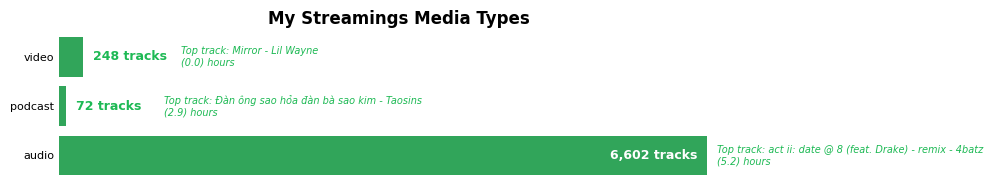

In [31]:
streaming_media_type_agg = (
    streaming_df
    .groupby("media_type")
    .agg(count_track=("track_id", "nunique"), sum_played=("hour_played","sum"))
    .sort_values("sum_played")
    .reset_index()
)
streaming_agg = (
    streaming_df
    .groupby(["media_type","track_name","track_id","artist"])
    .agg(sum_played=("hour_played","sum"))
    .sort_values("sum_played")
    .reset_index()
)
top_streaming_track = (
    streaming_agg
    .sort_values(["media_type", "sum_played"], ascending=[True, False])
    .drop_duplicates(["media_type"])
    .rename(columns={"track_name": "top_track", "artist": "top_artist", "sum_played": "top_track_played"})
)
streaming_media_type_agg = streaming_media_type_agg.merge(top_streaming_track, on="media_type", how="left")
streaming_media_type_agg["top_track"] = 'Top track: ' + streaming_media_type_agg["top_track"] + ' - ' + streaming_media_type_agg["top_artist"] + '\n(' + streaming_media_type_agg["top_track_played"].apply(lambda x: f"{x:,.1f}").astype(str) + ') hours'

plt.figure(figsize=(10,2))
ax = sns.barplot(
    data=streaming_media_type_agg,
    y="media_type",
    x=streaming_media_type_agg["count_track"],
    dodge=False,
    # palette=colors
    color="#1db954"
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=8, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, top_track) in enumerate(zip(streaming_media_type_agg["count_track"], streaming_media_type_agg["top_track"])):
    if value > 1000:
        ax.text(value-100, i, f"{value:,.0f}" + " tracks", va="center", fontsize=9, ha="right", color="white", fontweight = "bold")
        ax.text(value+100, i, top_track, va="center", fontsize=7, ha="left", color="#1db954", fontstyle="italic" )
    else:
        ax.text(value+100, i, f"{value:,.0f}" + " tracks", va="center", fontsize=9, ha="left", color="#1db954", fontweight = "bold")
        ax.text(value+1000, i, top_track, va="center", fontsize=7, ha="left", color="#1db954", fontstyle="italic" )

plt.title("My Streamings Media Types", fontweight="bold")
sns.despine(bottom = True, left = True)
plt.tight_layout()
# plt.savefig("IV.2. MY STREAMINGs Media Types contributions.png")
plt.show()

## **VI.2. TOP 20 MY STREAMINGs audio tracks**

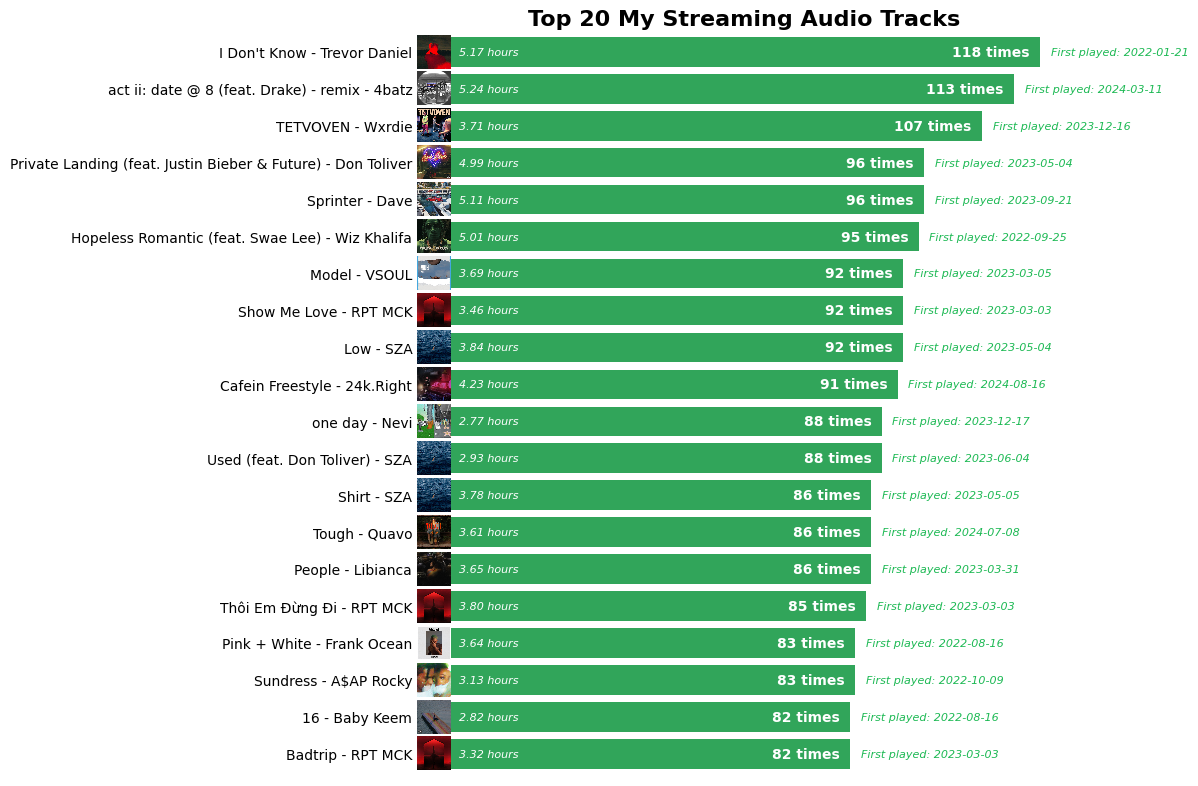

In [177]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

# --- Tạo dataframe tổng hợp ---
streaming_track_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby(["track_name", "track_id", "artist", "track_local_path"])
    .agg(
        count_track=("track_id", "count"),
        sum_played=("hour_played", "sum"),
        first_played=("datetime", "min"),
    )
    .sort_values(by="count_track", ascending=False)
    .reset_index()
)

streaming_track_agg["track_name"] = streaming_track_agg["track_name"] + " - " + streaming_track_agg["artist"]
streaming_track_agg["first_played"] = "First played: " + streaming_track_agg["first_played"].dt.to_period("D").astype(str)

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(
    data=streaming_track_agg.head(20),
    y="track_name",
    x="count_track",
    dodge=False,
    color="#1db954",
    ax=ax
)

for i, (path, value) in enumerate(zip(streaming_track_agg["track_local_path"].head(20),streaming_track_agg["count_track"].head(20))):
    try:
        if os.path.exists(path):
            img = mpimg.imread(path) 
            imagebox = OffsetImage(img, zoom=0.08)
            ab = AnnotationBbox(
                imagebox,
                (0, i),
                frameon=False,
                xycoords="data",
                box_alignment=(0, 0.5)
            )
            ax.add_artist(ab)
        else:
            print(f"File not exist: {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

for i, (value, first_played, sum_played) in enumerate(zip(streaming_track_agg["count_track"].head(20),streaming_track_agg["first_played"].head(20),streaming_track_agg["sum_played"].head(20))):
    ax.text(value - 2, i, f"{value:,.0f} times", va="center", fontsize=10,ha="right", color="white", fontweight="bold")
    ax.text(value + 2, i, first_played, va="center", ha="left", fontsize=8,color="#1db954", fontstyle="italic")
    ax.text(8, i, f"{sum_played:,.2f} hours", va="center", ha="left",fontsize=8, color="white", fontstyle="italic")

ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="y", labelsize=10, length=0)
ax.tick_params(axis="x", bottom=False, labelbottom=False)
ax.grid(False)

plt.title("Top 20 My Streaming Audio Tracks", fontweight="bold", fontsize=16)
sns.despine(bottom=True, left=True)
# plt.xlim(40, 120)
plt.tight_layout()
plt.savefig("VI.2. TOP 20 MY STREAMINGs audio tracks.png")
plt.show()


## **VI.3. TOP 20 MY STREAMINGs audio artists**

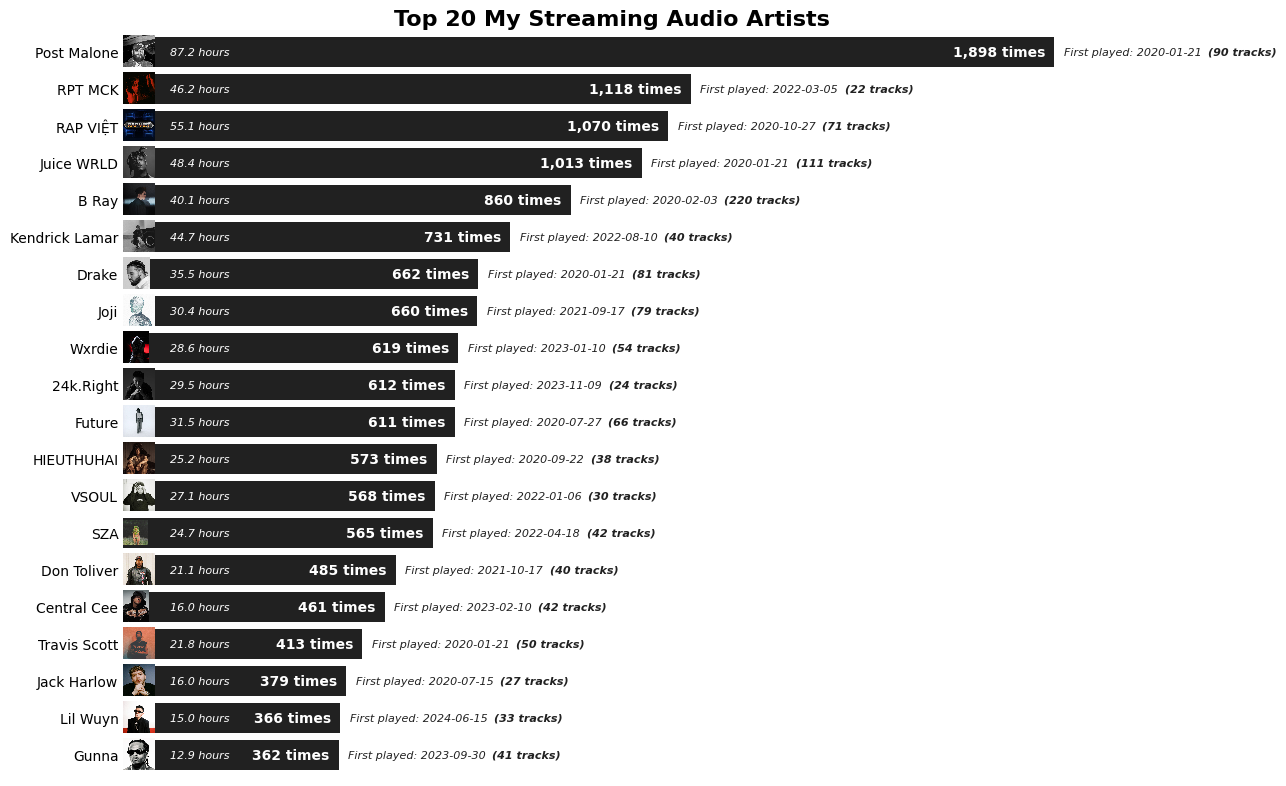

In [178]:
streaming_audio_artist_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby(["artist","artist_local_path"])
    .agg(count_times=("track_id", "count"), sum_played=("hour_played","sum"), first_played = ("datetime","min"), count_track = ("track_id","nunique"))
    .sort_values(by="count_times",ascending=False)
    .reset_index()
)
streaming_audio_artist_agg["first_played"] = "First played: " + streaming_audio_artist_agg["first_played"].dt.to_period("D").astype(str)

fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(
    data=streaming_audio_artist_agg.head(20),
    y="artist",
    x=(streaming_audio_artist_agg["count_times"]).head(20)+100,
    dodge=False,
    # palette="crest_r"
    color="#212121"
)

for i, path in enumerate(streaming_audio_artist_agg["artist_local_path"].head(20)):
    try:
        if os.path.exists(path):
            img = mpimg.imread(path) 
            imagebox = OffsetImage(img, zoom=0.035)
            ab = AnnotationBbox(
                imagebox,
                (0, i),
                frameon=False,
                xycoords="data",
                box_alignment=(0, 0.5)
            )
            ax.add_artist(ab)
        else:
            print(f"File not exist: {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=10, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)

for i, (value, first_played, sum_played, count_track) in enumerate(zip(streaming_audio_artist_agg["count_times"].head(20), streaming_audio_artist_agg["first_played"].head(20), streaming_audio_artist_agg["sum_played"].head(20), streaming_audio_artist_agg["count_track"].head(20))):
     ax.text(value+100-20, i, f"{value:,.0f}" + " times", va="center", fontsize=10, ha="right", color="white", fontweight = "bold")
     ax.text(value+100+20, i, first_played, va="center", ha="left", fontsize=8, color="#212121", fontstyle= 'italic')
     ax.text(value+100+330, i, "(" + f"{count_track:,.0f}" + " tracks)", va="center", ha="left", fontsize=8, color="#212121", fontstyle= 'italic', fontweight = "bold")
     ax.text(100, i, f"{sum_played:,.1f}" + " hours", va="center", ha="left", fontsize=8, color="white", fontstyle= 'italic')

plt.title("Top 20 My Streaming Audio Artists", fontweight="bold", fontsize=16)
sns.despine(bottom = True, left = True)
# plt.xlim(40,120)
plt.tight_layout()
plt.savefig("VI.3. TOP 20 MY STREAMINGs audio artists.png")
plt.show()

## **VI.4. TOP 20 MY STREAMINGs audio albums**

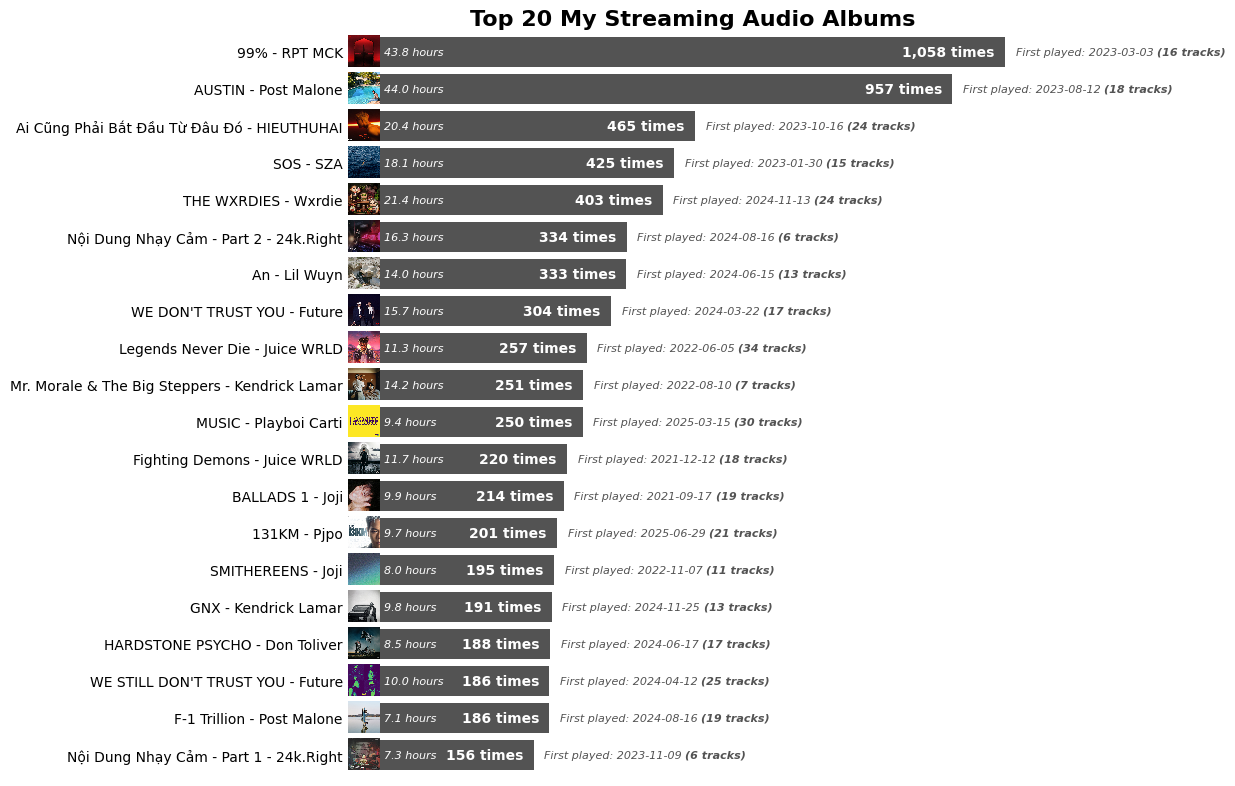

In [179]:
streaming_audio_album_agg = (
    streaming_df[streaming_df["media_type"] == "audio"]
    .groupby(["artist","album","album_local_path"])
    .agg(count_times=("track_id", "count"), sum_played=("hour_played","sum"), first_played = ("datetime","min"), count_track = ("track_id","nunique"))
    .sort_values(by="count_times",ascending=False)
    .reset_index()
)
streaming_audio_album_agg["first_played"] = "First played: " + streaming_audio_album_agg["first_played"].dt.to_period("D").astype(str)
streaming_audio_album_agg["album"] = streaming_audio_album_agg["album"] + " - " + streaming_audio_album_agg["artist"]

fig, ax = plt.subplots(figsize=(13,8))
ax = sns.barplot(
    data=streaming_audio_album_agg.head(20),
    y="album",
    x=(streaming_audio_album_agg["count_times"]).head(20)+200,
    dodge=False,
    # palette="flare"
    color="#535353"
)

for i, path in enumerate(streaming_audio_album_agg["album_local_path"].head(20)):
    try:
        if os.path.exists(path):
            img = mpimg.imread(path) 
            imagebox = OffsetImage(img, zoom=0.035)
            ab = AnnotationBbox(
                imagebox,
                (0, i),
                frameon=False,
                xycoords="data",
                box_alignment=(0, 0.5)
            )
            ax.add_artist(ab)
        else:
            print(f"File not exist: {path}")
    except Exception as e:
        print(f"Error loading {path}: {e}")

ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis='y', labelsize=10, length=0)
ax.tick_params(axis='x', bottom=False, labelbottom=False)
ax.grid(False)
for i, (value, first_played, sum_played, count_track) in enumerate(zip(streaming_audio_album_agg["count_times"].head(20), streaming_audio_album_agg["first_played"].head(20), streaming_audio_album_agg["sum_played"].head(20), streaming_audio_album_agg["count_track"].head(20))):
     ax.text(value+200-20, i, f"{value:,.0f}" + " times", va="center", fontsize=10, ha="right", color="white", fontweight = "bold")
     ax.text(value+200+20, i, first_played, va="center", ha="left", fontsize=8, color="#535353", fontstyle= 'italic')
     ax.text(value+200+290, i, "(" + f"{count_track:,.0f}" + " tracks)", va="center", ha="left", fontsize=8, color="#535353", fontstyle= 'italic', fontweight = "bold")
     ax.text(70, i, f"{sum_played:,.1f}" + " hours", va="center", ha="left", fontsize=8, color="white", fontstyle= 'italic')

plt.title("Top 20 My Streaming Audio Albums", fontweight="bold", fontsize=16)
sns.despine(bottom = True, left = True)
# plt.xlim(40,120)
plt.tight_layout()
plt.savefig("VI.4. TOP 20 MY STREAMINGs audio albums.png")
plt.show()

## **VI.5. MY STREAMINGs by year**

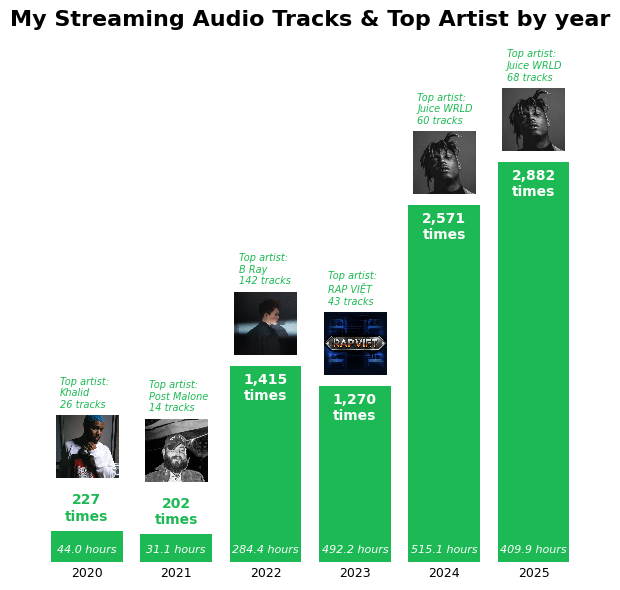

In [180]:
streaming_df["year"] = streaming_df["datetime"].dt.to_period("Y")
streaming_year_agg = (
    streaming_df
    .sort_values("datetime")
    .groupby("year")
    .agg(count_track=("track_id", "nunique"), sum_played=("hour_played","sum"))
    .reset_index()
)
streaming_artist_year_agg = (
    streaming_df
    .sort_values("datetime")
    .groupby(["year","artist","artist_local_path"])
    .agg(count_track=("track_id", "nunique"))
    .reset_index()
)
top_artist_year = (
    streaming_artist_year_agg
    .sort_values(["year", "count_track"], ascending=[True, False])
    .drop_duplicates("year")
    .rename(columns={"artist": "top_artist","count_track":"top_artist_track"})
)
streaming_year_agg = streaming_year_agg.merge(top_artist_year, on="year", how="left")
streaming_year_agg["top_artist"] = "Top artist:\n" + streaming_year_agg["top_artist"] + "\n" + streaming_year_agg["top_artist_track"].astype(str) + " tracks"
streaming_year_agg["year"] = streaming_year_agg["year"].astype(str)

plt.figure(figsize=(6,6))
bars = plt.bar(streaming_year_agg["year"], streaming_year_agg["count_track"], color="#1db954")

for bar, top_artist, sum_played, artist_local_path in zip(bars, streaming_year_agg["top_artist"], streaming_year_agg["sum_played"], streaming_year_agg["artist_local_path"]):
    plt.text(bar.get_x() + bar.get_width()/2, 50, f"{sum_played:,.1f}" + " hours", ha='center', va='bottom', fontsize=8, fontstyle="italic", rotation=0, color="white")
    if bar.get_height() > 300:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()-50, f"{bar.get_height():,.0f}" + "\ntimes", ha='center', va='top', fontsize=10, fontweight="bold", color="white")
        plt.text(bar.get_x() + bar.get_width()/2-0.3, bar.get_height()+570, top_artist, ha='left', va='bottom', fontsize=7, fontstyle="italic", rotation=0, color="#1db954")
    else:
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+50, f"{bar.get_height():,.0f}"  + "\ntimes", ha='center', va='bottom', fontsize=10, fontweight="bold", color="#1db954")
        plt.text(bar.get_x() + bar.get_width()/2-0.3, bar.get_height()+870, top_artist, ha='left', va='bottom', fontsize=7, fontstyle="italic", rotation=0, color="#1db954")
    if artist_local_path and os.path.exists(artist_local_path):
        try:
            img = mpimg.imread(artist_local_path)
            imagebox = OffsetImage(img, zoom=0.07)
            if bar.get_height() > 300:
                ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width()/2, bar.get_height()+300), frameon=False)
            else:
                ab = AnnotationBbox(imagebox, (bar.get_x() + bar.get_width()/2, bar.get_height()+600), frameon=False)
            plt.gca().add_artist(ab)
        except Exception as e:
            print(f"Error loading image {artist_local_path}: {e}")

plt.xticks(fontsize=9)
plt.yticks([])
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.ylim(0,3800)
plt.title("My Streaming Audio Tracks & Top Artist by year", fontweight="bold", fontsize=16)
plt.tight_layout()
sns.despine(bottom = True, left = True)
plt.savefig("VI.5. MY STREAMINGs by year.png")
plt.show()

## **VI.6. MY STREAMINGs by month**

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1651/2015456988.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = streaming_month_pivot_track.applymap(lambda x: f"{x:,.0f}" if x != 0 else "") + " times \n" + streaming_month_pivot_played.round(1).astype(str) + " hours"


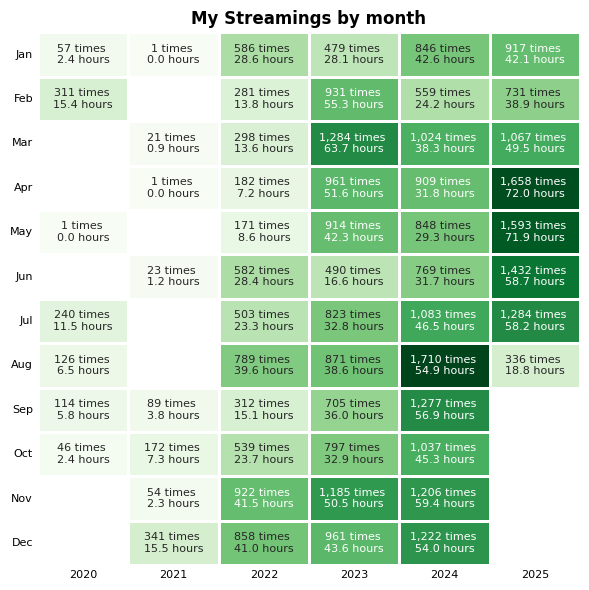

In [181]:
streaming_df["month_number"] = streaming_df["datetime"].dt.month
streaming_df["month"] = streaming_df["datetime"].dt.strftime("%b")
streaming_month_pivot_track = streaming_df.pivot_table(
    index="month_number",
    columns="year",
    values="track_id",
    aggfunc="count",
    fill_value=0
)
streaming_month_pivot_played = streaming_df.pivot_table(
    index="month_number",
    columns="year",
    values="hour_played",
    aggfunc="sum",
    fill_value=0
)

month_order = streaming_df[["month_number","month"]].drop_duplicates().sort_values("month_number")["month"].values
streaming_month_pivot_track.index = month_order
streaming_month_pivot_played.index = month_order
mask = streaming_month_pivot_track == 0

annot = streaming_month_pivot_track.applymap(lambda x: f"{x:,.0f}" if x != 0 else "") + " times \n" + streaming_month_pivot_played.round(1).astype(str) + " hours"


plt.figure(figsize=(6,6))
sns.heatmap(streaming_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":8})
plt.title("My Streamings by month", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("VI.6. MY STREAMINGs by month.png")
plt.show()

## **VI.7. MY STREAMINGs Top Artist by month**

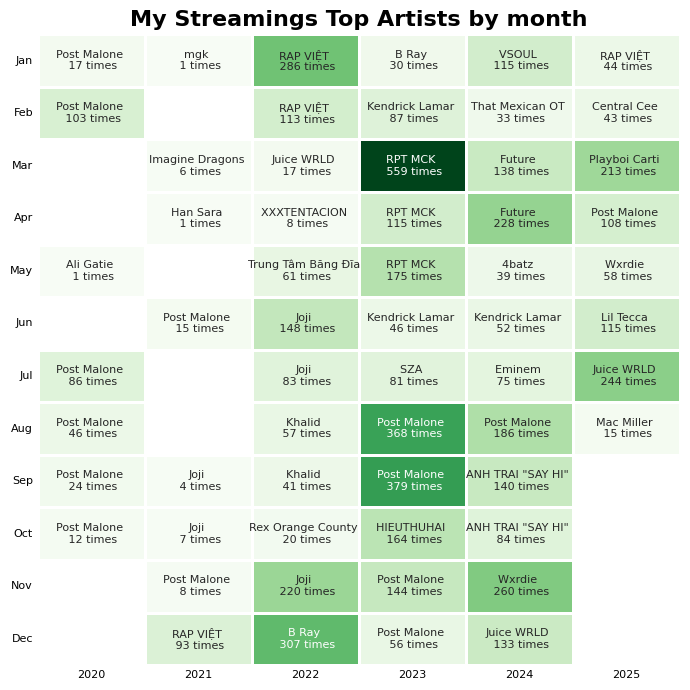

In [182]:
streaming_artist_month = (
    streaming_df
    .groupby(["year", "month_number", "artist", "artist_local_path"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_top_artist_month = (
    streaming_artist_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_artist_month_pivot = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="artist"
)
streaming_top_artist_month_pivot_track = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

def shorten_text(owner):
    if pd.isna(owner) or not isinstance(owner, str):
        return ""
    words = owner.strip().split()
    return " ".join(words[:4]) if len(words) > 4 else owner

annot = (streaming_top_artist_month_pivot.stack()
    .astype(str)
    .to_frame("artist")
    .assign(artist=lambda df: df["artist"].apply(shorten_text))
    .join(streaming_top_artist_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['artist']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_artist_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(7,7))
sns.heatmap(streaming_top_artist_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_artist_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Artists by month", fontweight="bold", fontsize=16)
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("VI.7. MY STREAMINGs Top Artist by month.png")
plt.show()

### **VI.7.+ [THUMBNAIL] MY STREAMINGs Top Artist by month**

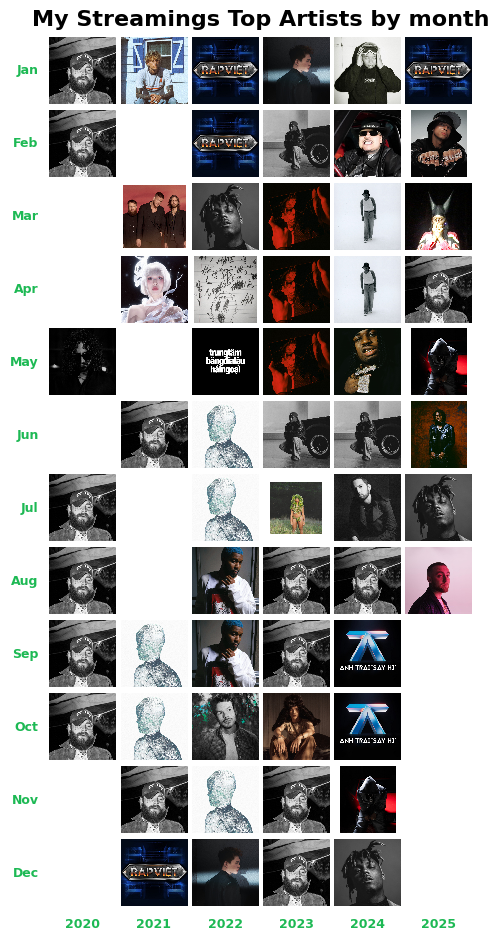

In [183]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox # type: ignore
from PIL import Image # type: ignore

# Month names for display
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a mapping from artist name to local image path
artist_to_img_path = dict(zip(streaming_df['artist'], streaming_df['artist_local_path']))

# Build pivot table: top artist each month
streaming_artist_month = (
    streaming_df
    .groupby(["year", "month_number", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)

streaming_top_artist_month = (
    streaming_artist_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)

streaming_top_artist_month_pivot = streaming_top_artist_month.pivot(index="month_number", columns="year", values="artist").sort_index()

# Create figure
fig, ax = plt.subplots(figsize=(5,9.5))
ax.axis('off')

# Calculate cell dimensions
n_rows = len(streaming_top_artist_month_pivot)
n_cols = len(streaming_top_artist_month_pivot.columns)
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

# Iterate through each cell in the pivot table
for i, (month_num, row) in enumerate(streaming_top_artist_month_pivot.iterrows()):
    for j, year in enumerate(streaming_top_artist_month_pivot.columns):
        artist_name = row[year]
        
        if pd.isna(artist_name) or artist_name in ['Unknown']:
            continue  # Skip unknown
        
        # Get local image path
        img_path = artist_to_img_path.get(artist_name)
        
        if img_path and pd.notna(img_path):
            try:
                # Load and resize image from local path
                img = Image.open(img_path)
                
                # Convert to array
                img_array = np.array(img)
                
                # Position
                x = j * cell_width + cell_width/2
                y = 1 - (i * cell_height + cell_height/2)  # Invert y-axis
                
                # Create image box
                imagebox = OffsetImage(img_array, zoom=0.075)
                ab = AnnotationBbox(imagebox, (x, y), frameon=False)
                ax.add_artist(ab)
                
            except Exception as e:
                print(f"Error loading image for {artist_name} from {img_path}: {e}")
                pass

# Add column headers (years) at the bottom
for j, year in enumerate(streaming_top_artist_month_pivot.columns):
    x = j * cell_width + cell_width/2
    y = -0.01
    ax.text(x, y, str(year), ha='center', va='top', fontsize=9, weight='bold', color="#1db954")

# Add row headers (month names) on the left
for i, month_num in enumerate(streaming_top_artist_month_pivot.index):
    x = -0.02
    y = 1 - (i * cell_height + cell_height/2)
    month_name = month_names[month_num-1] if 1 <= month_num <= 12 else f"Month {month_num}"
    ax.text(x, y, month_name, ha='right', va='center', fontsize=9, weight='bold', color="#1db954")

plt.title("My Streamings Top Artists by month", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.savefig("VI.7.PLUS MY STREAMINGs Top Artist by month.png")
plt.show()


## **VI.8. MY STREAMINGs Top Audio Track by month**

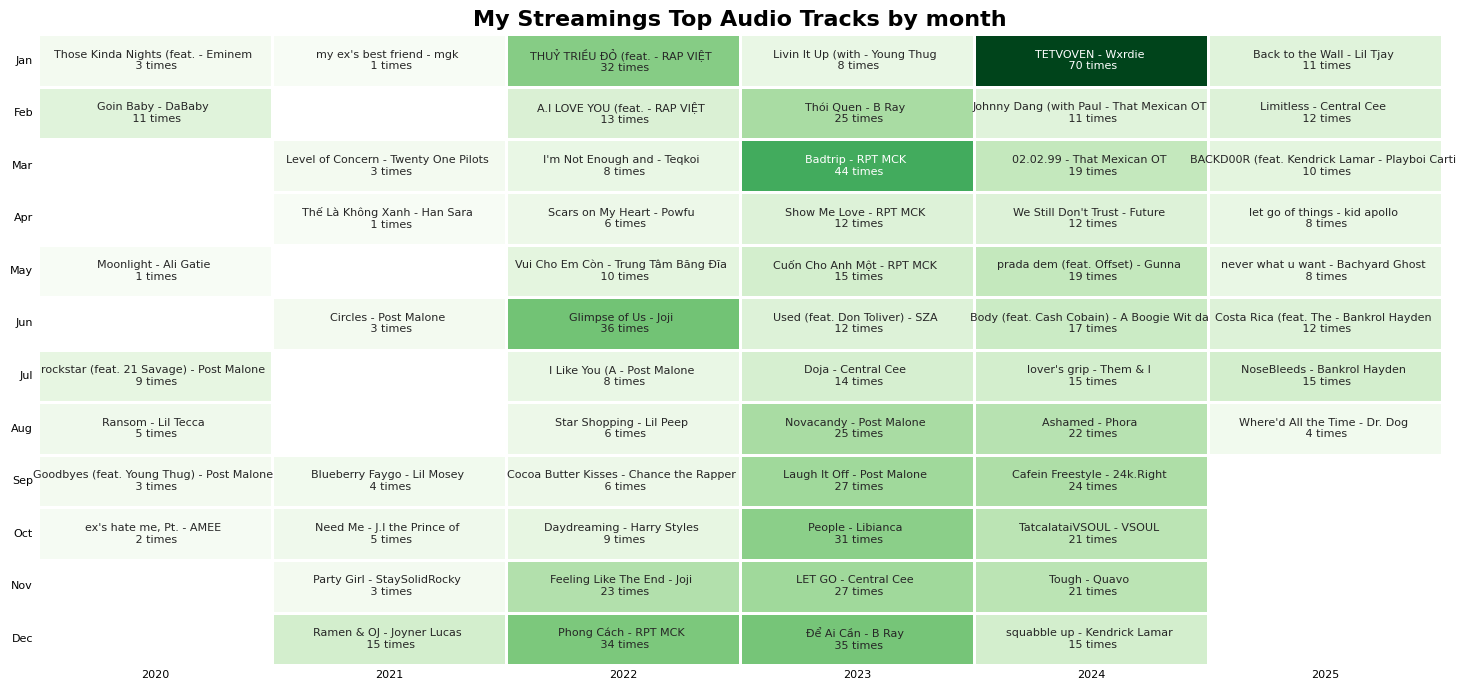

In [184]:
streaming_artist_month = (
    streaming_df
    .groupby(["year", "month_number", "track_id", "track_name", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_artist_month["track_name"] = streaming_artist_month["track_name"].apply(shorten_text) + ' - ' + streaming_artist_month["artist"].apply(shorten_text)
streaming_top_artist_month = (
    streaming_artist_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_artist_month_pivot = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="track_name"
)
streaming_top_artist_month_pivot_track = streaming_top_artist_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

annot = (streaming_top_artist_month_pivot.stack()
    .astype(str)
    .to_frame("track")
    .join(streaming_top_artist_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['track']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_artist_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(15,7))
sns.heatmap(streaming_top_artist_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_artist_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Audio Tracks by month", fontweight="bold", fontsize=16)
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("VI.8. MY STREAMINGs Top Audio Track by month.png")
plt.show()

### **VI.8.+ [THUMBNAIL] MY STREAMINGs Top Audio Track by month**

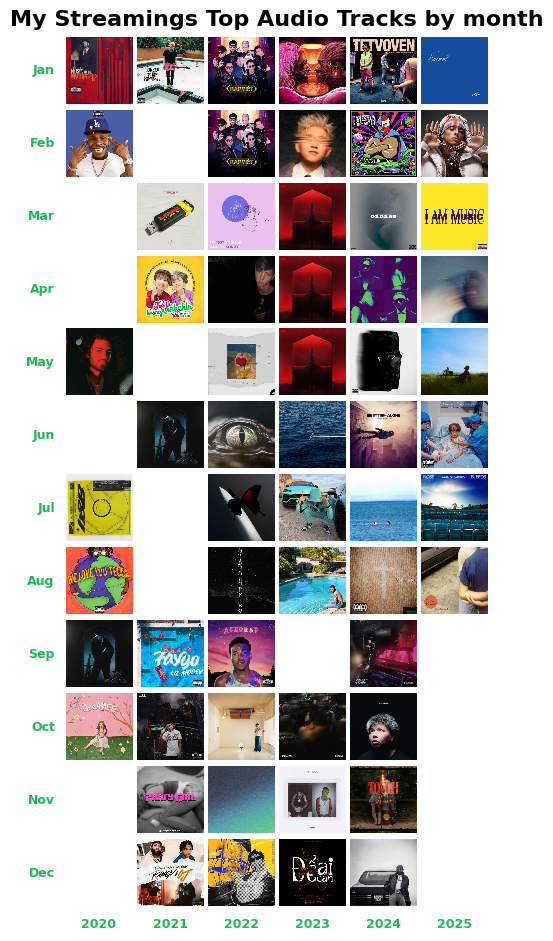

In [185]:
# Month names for display
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a mapping from artist name to local image path
track_to_img_path = dict(zip(streaming_df['track_id'], streaming_df['track_local_path']))

# Build pivot table: top artist each month
streaming_track_month = (
    streaming_df
    .groupby(["year", "month_number", "track_id"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)

streaming_top_track_month = (
    streaming_track_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)

streaming_top_track_month_pivot = streaming_top_track_month.pivot(index="month_number", columns="year", values="track_id").sort_index()

# Create figure
fig, ax = plt.subplots(figsize=(5,9.5))
ax.axis('off')

# Calculate cell dimensions
n_rows = len(streaming_top_track_month_pivot)
n_cols = len(streaming_top_track_month_pivot.columns)
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

# Iterate through each cell in the pivot table
for i, (month_num, row) in enumerate(streaming_top_track_month_pivot.iterrows()):
    for j, year in enumerate(streaming_top_track_month_pivot.columns):
        track_name = row[year]
        
        if pd.isna(track_name) or track_name in ['Unknown']:
            continue  # Skip unknown
        
        # Get local image path
        img_path = track_to_img_path.get(track_name)
        
        if img_path and pd.notna(img_path):
            try:
                # Load and resize image from local path
                img = Image.open(img_path)
                
                # Convert to array
                img_array = np.array(img)
                
                # Position
                x = j * cell_width + cell_width/2
                y = 1 - (i * cell_height + cell_height/2)  # Invert y-axis
                
                # Create image box
                imagebox = OffsetImage(img_array, zoom=0.16)
                ab = AnnotationBbox(imagebox, (x, y), frameon=False)
                ax.add_artist(ab)
                
            except Exception as e:
                print(f"Error loading image for {artist_name} from {img_path}: {e}")
                pass

# Add column headers (years) at the bottom
for j, year in enumerate(streaming_top_track_month_pivot.columns):
    x = j * cell_width + cell_width/2
    y = -0.01
    ax.text(x, y, str(year), ha='center', va='top', fontsize=9, weight='bold', color="#1db954")

# Add row headers (month names) on the left
for i, month_num in enumerate(streaming_top_track_month_pivot.index):
    x = -0.02
    y = 1 - (i * cell_height + cell_height/2)
    month_name = month_names[month_num-1] if 1 <= month_num <= 12 else f"Month {month_num}"
    ax.text(x, y, month_name, ha='right', va='center', fontsize=9, weight='bold', color="#1db954")

plt.title("My Streamings Top Audio Tracks by month", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.savefig("VI.8.PLUS MY STREAMINGs Top Audio Track by month.png")
plt.show()


## **VI.9. MY STREAMINGs Top Album by month**

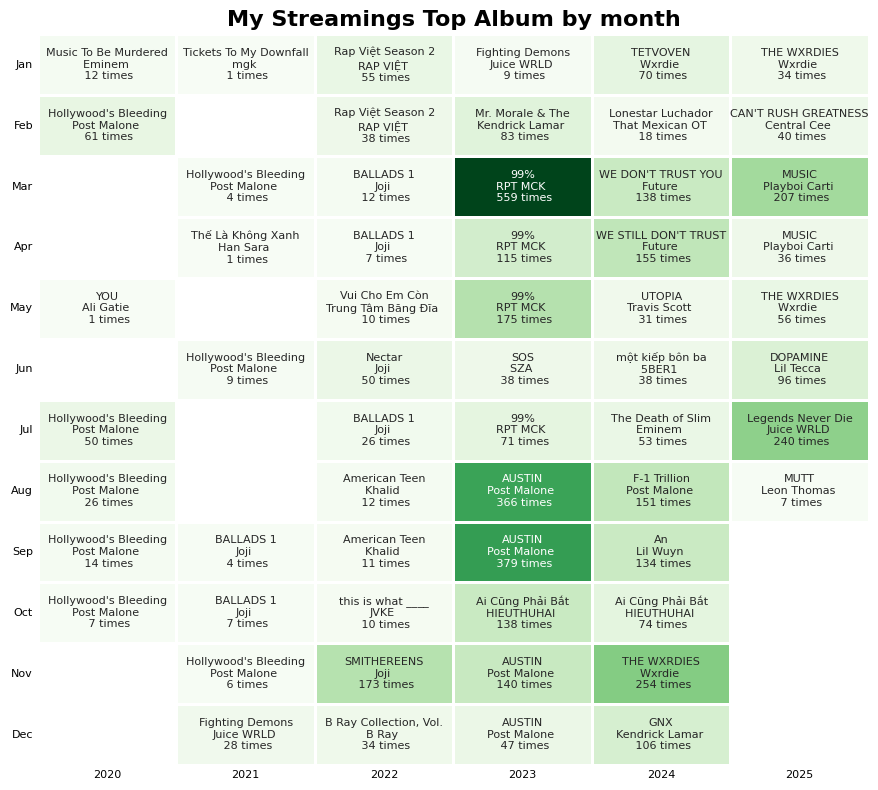

In [186]:
streaming_album_month = (
    streaming_df
    .groupby(["year", "month_number", "album", "artist"])
    .agg(count_track=("track_id", "count"))
    .reset_index()
)
streaming_album_month["album"] = streaming_album_month["album"].apply(shorten_text) + '\n' + streaming_album_month["artist"].apply(shorten_text)

streaming_top_album_month = (
    streaming_album_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)
streaming_top_album_month_pivot = streaming_top_album_month.pivot(
    index="month_number",
    columns="year",
    values="album"
)
streaming_top_album_month_pivot_track = streaming_top_album_month.pivot(
    index="month_number",
    columns="year",
    values="count_track"
)

annot = (streaming_top_album_month_pivot.stack()
    .astype(str)
    .to_frame("album")
    .join(streaming_top_album_month_pivot_track.stack().to_frame("count_track"))
    .apply(lambda row: f"{row['album']} \n {row['count_track']:,.0f} times", axis=1)
    .unstack()
)

streaming_top_album_month_pivot_track.index = month_order
annot.index = month_order

plt.figure(figsize=(9,8))
sns.heatmap(streaming_top_album_month_pivot_track, annot=annot, fmt="", cmap="Greens", linewidths=1, cbar=False, mask=streaming_top_album_month_pivot_track.isna(), annot_kws={"fontsize":8})
plt.title("My Streamings Top Album by month", fontweight="bold", fontsize=16)
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("VI.9. MY STREAMINGs Top Album by month.png")
plt.show()

### **VI.9.+ [THUMBNAIL] MY STREAMINGs Top Album by month**

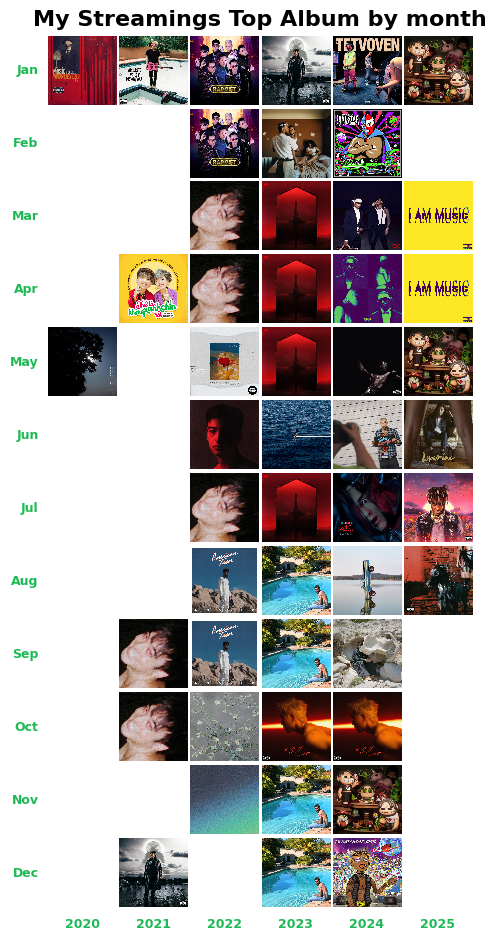

In [187]:
# Month names for display
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a mapping from artist name to local image path
album_to_img_path = dict(zip(streaming_df['album'], streaming_df['album_local_path']))

# Build pivot table: top artist each month
streaming_album_month = (
    streaming_df
    .groupby(["year", "month_number", "album"])
    .agg(count_track=("album", "count"))
    .reset_index()
)

streaming_top_album_month = (
    streaming_album_month
    .sort_values(["year", "month_number", "count_track"], ascending=[True, True, False])
    .drop_duplicates(subset=["year", "month_number"])
)

streaming_top_album_month_pivot = streaming_top_album_month.pivot(index="month_number", columns="year", values="album").sort_index()

# Create figure
fig, ax = plt.subplots(figsize=(5,9.5))
ax.axis('off')

# Calculate cell dimensions
n_rows = len(streaming_top_album_month_pivot)
n_cols = len(streaming_top_album_month_pivot.columns)
cell_width = 1.0 / n_cols
cell_height = 1.0 / n_rows

# Iterate through each cell in the pivot table
for i, (month_num, row) in enumerate(streaming_top_album_month_pivot.iterrows()):
    for j, year in enumerate(streaming_top_album_month_pivot.columns):
        album_name = row[year]
        
        if pd.isna(album_name) or album_name in ['Unknown']:
            continue  # Skip unknown
        
        # Get local image path
        img_path = album_to_img_path.get(album_name)
        
        if img_path and pd.notna(img_path):
            try:
                # Load and resize image from local path
                img = Image.open(img_path)
                
                # Convert to array
                img_array = np.array(img)
                
                # Position
                x = j * cell_width + cell_width/2
                y = 1 - (i * cell_height + cell_height/2)  # Invert y-axis
                
                # Create image box
                imagebox = OffsetImage(img_array, zoom=0.077)
                ab = AnnotationBbox(imagebox, (x, y), frameon=False)
                ax.add_artist(ab)
                
            except Exception as e:
                print(f"Error loading image for {artist_name} from {img_path}: {e}")
                pass

# Add column headers (years) at the bottom
for j, year in enumerate(streaming_top_album_month_pivot.columns):
    x = j * cell_width + cell_width/2
    y = -0.01
    ax.text(x, y, str(year), ha='center', va='top', fontsize=9, weight='bold', color="#1db954")

# Add row headers (month names) on the left
for i, month_num in enumerate(streaming_top_album_month_pivot.index):
    x = -0.02
    y = 1 - (i * cell_height + cell_height/2)
    month_name = month_names[month_num-1] if 1 <= month_num <= 12 else f"Month {month_num}"
    ax.text(x, y, month_name, ha='right', va='center', fontsize=9, weight='bold', color="#1db954")

plt.title("My Streamings Top Album by month", fontweight="bold", fontsize=16)
plt.tight_layout()
plt.savefig("VI.9.PLUS MY STREAMINGs Top Album by month.png")
plt.show()


## **VI.10. MY STREAMINGs by hour**

/var/folders/7q/sfnchm8d521c9vslcz802kw80000gn/T/ipykernel_1651/1833197153.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = streaming_hour_pivot.applymap(lambda x: f"{x:,.1f}" if x != 0 else "") + " hours"


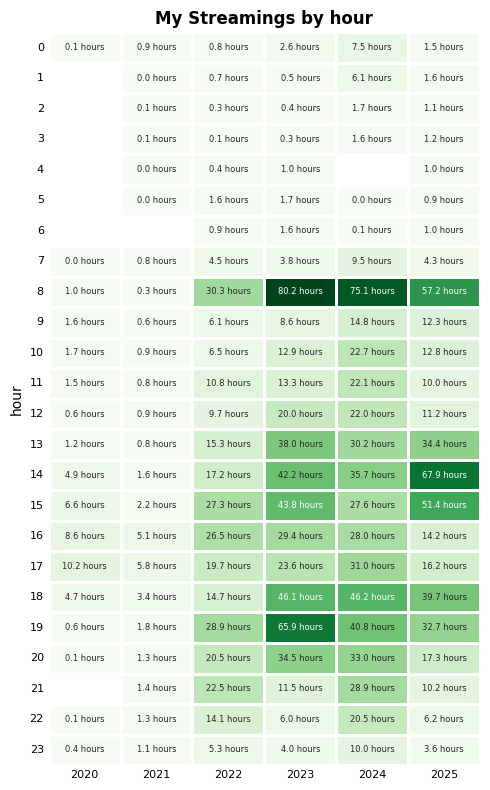

In [188]:
streaming_df["hour"] = streaming_df["datetime"].dt.hour

streaming_hour_pivot = streaming_df.pivot_table(
    index="hour",
    columns="year",
    values="hour_played",
    aggfunc="sum",
    fill_value=0
)

mask = streaming_hour_pivot == 0
annot = streaming_hour_pivot.applymap(lambda x: f"{x:,.1f}" if x != 0 else "") + " hours"

plt.figure(figsize=(5,8))
sns.heatmap(streaming_hour_pivot, annot=annot, fmt="s", cmap="Greens", linewidths=1, cbar=False, mask=mask, annot_kws={"fontsize":6})
plt.title("My Streamings by hour", fontweight="bold")
plt.yticks(rotation=0, fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel("")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
plt.tight_layout()
plt.savefig("VI.10. MY STREAMINGs by hour.png")
plt.show()

## **VI.11. MY STREAMINGs over time**

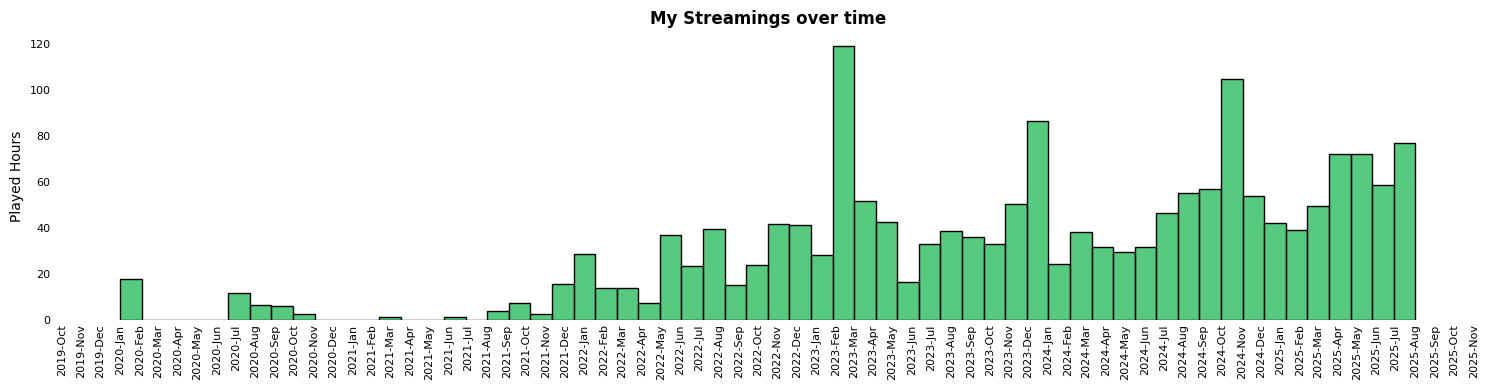

In [189]:
import matplotlib.dates as mdates

streaming_df["month2"] = streaming_df["datetime"].dt.to_period("M")
streaming_month_agg = streaming_df.groupby(["month2","year"], as_index=False)["hour_played"].sum()
streaming_month_agg["month2"] = streaming_month_agg["month2"].dt.to_timestamp()

plt.figure(figsize=(15,4))
sns.histplot(data=streaming_month_agg, x="month2", weights="hour_played", bins=60, color="#1db954")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%b"))
plt.title("My Streamings over time", fontweight="bold")
plt.yticks(rotation=0, fontsize=8)
plt.xticks(rotation=90, fontsize=8)
plt.xlabel("")
plt.ylabel("Played Hours")
plt.tick_params(axis='y', length=0)
plt.tick_params(axis='x', length=0)
sns.despine(bottom = True, left = True)

plt.tight_layout()
plt.savefig("VI.11. MY STREAMINGs over time.png")
plt.show()

---
# **THE END**

In [190]:
folder_path = "/Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/outputs/images"
markdown_lines = []

for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".png"):
        old_path = os.path.join(folder_path, filename)
        # Thay khoảng trắng bằng dấu gạch ngang
        new_filename = filename.replace(" ", "-")
        new_path = os.path.join(folder_path, new_filename)

        # Rename file
        os.rename(old_path, new_path)

        # Tạo dòng markdown
        markdown_lines.append(f"![](images/{new_filename})")

# Ghi ra file markdown
output_md = os.path.join(folder_path, "images.md")
with open(output_md, "w") as f:
    f.write("\n\n".join(markdown_lines))

print("✅ Done. Markdown saved to:", output_md)

✅ Done. Markdown saved to: /Users/tainguyen/Desktop/Python/my-spotify-activity-2025-08-11/outputs/images/images.md
